# Установим необходимые библиотеки

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Для управления предупреждениями

from sklearn import linear_model
# print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [198]:
db_path='C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/diabetes_coursework/diabetes_012_health_indicators_BRFSS2015.csv'
data= pd.read_csv(db_path)
# Установим максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Выполним преобразование данных в целочисленный тип (integer).

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Выведем информацию о количестве строк и столбцов датасета

In [200]:
# df.shape
print(f"Num rows: {len(data)}")
print(f"Num columns: {len(data.columns)}")

Num rows: 253680
Num columns: 22


In [201]:
data.shape

(253680, 22)

# Визуализируем данные по целевой переменной (0 - No diabetes, 1 - pred-diabetes, 2 - diabetes

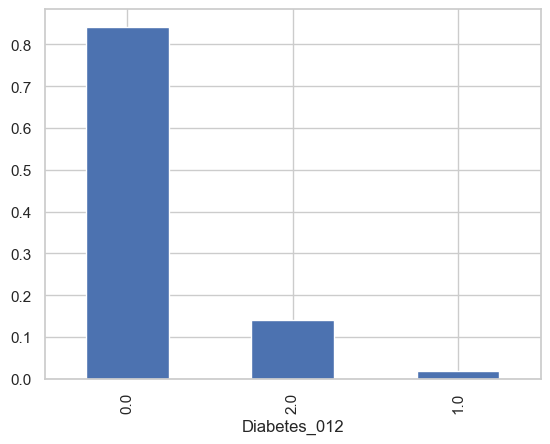

In [202]:
data['Diabetes_012'].value_counts(normalize=True).plot(kind='bar');

# Выведем названия столбцов датасета

In [203]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Используем метод data.describe() из pandas для получения сводной статистики о данных датасета. Этот метод предоставляет полезную информацию о распределении данных в каждом столбце, включая такие статистические показатели

In [204]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Применим метод isnull().sum(), библиотека pandas, для проверки наличия пропущенных (нулевых) значений в DataFrame data. Этот метод возвращает новый DataFrame того же размера, что и data, где каждое значение заменяется на True, если оно является пропущенным (null или NaN), и на False, если оно не является пропущенным.На выходе получаем логическую матрицу, где True указывает на наличие пропущенного значения.

In [205]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [206]:
# Проверка на наличие хотя бы одного пропущенного значения
has_missing_values = data.isnull().sum().any()
print(has_missing_values)  # Вывод: True

False


# как видим выше, пропущенных значений нет

# Проверим на дубликаты

In [207]:
data.duplicated().sum()

23899

# Метод loc для доступа к строкам и столбцам DF по меткам. В данном случае для выбора строк, которые соответствуют условию, указанному в квадратных скобках, то есть для выбора дубликатов. Двоеточие : после запятой указывает, что мы хотим выбрать все столбцы для этих строк.

In [208]:
data.loc[data.duplicated(),:]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


# Удалим дубликаты и выведем размер DF после их  удаления.

In [209]:
data.drop_duplicates(inplace=True)
data.shape

(229781, 22)

# Построим тепловую карту для визуализации корреляционной матрицы с помощью библиотеки seaborn, которая является высокоуровневой библиотекой для визуализации данных на основе matplotlib.data.corr(): Этот метод вычисляет корреляцию между числовыми столбцами в DataFrame data. Он возвращает корреляционную матрицу, где каждая ячейка содержит коэффициент корреляции Пирсона между двумя столбцами. Значения корреляции варьируются от -1 до 1:1 означает полную положительную корреляцию (когда один столбец увеличивается, другой также увеличивается).-1 означает полную отрицательную корреляцию (когда один столбец увеличивается, другой уменьшается).0 означает отсутствие корреляции.sns.heatmap(...): Этот метод из библиотеки seaborn создает тепловую карту (heatmap) на основе переданной матрицы. Тепловая карта визуализирует данные в виде цветных ячеек, где цвет каждой ячейки соответствует значению в матрице. annot=True: Этот параметр указывает, что значения корреляции должны быть отображены в ячейках тепловой карты. Если вы установите annot=False, значения не будут отображаться.cmap="YlGnBu": Этот параметр задает цветовую палитру для тепловой карты. В данном случае используется палитра "YlGnBu", которая представляет собой градиент от желтого (низкие значения) к синему (высокие значения).

<Axes: >

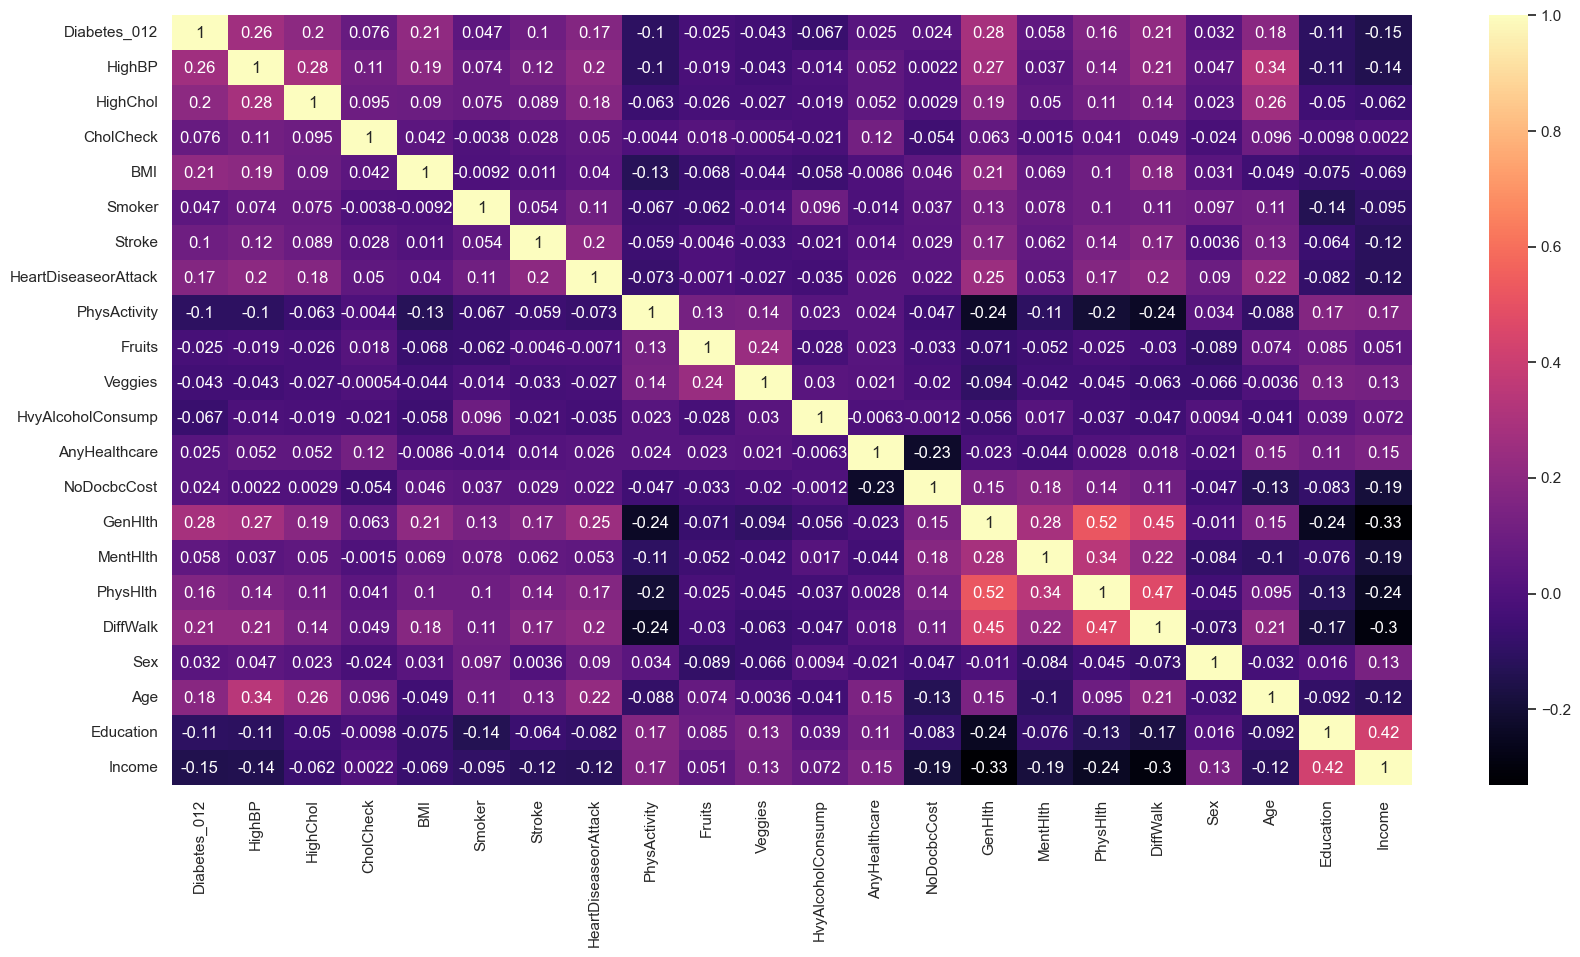

In [210]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="magma")

In [211]:
df_vis=data.copy()

# Преобразуем значения в копии DF для лучшего понимания при визуализации

In [212]:
#transform data
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'No Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pre Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High BP'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'

# Проведем визуализацию данных

# Проверим сколько уникальных значений содержит каждый столбец

In [213]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['количество уник.значений']).transpose()

,количество уник.значений
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


# Создадим список с 1го элемента(без Diabetes_012)	

In [214]:
cols = list(df_vis.columns)
cols_df=cols[1:]

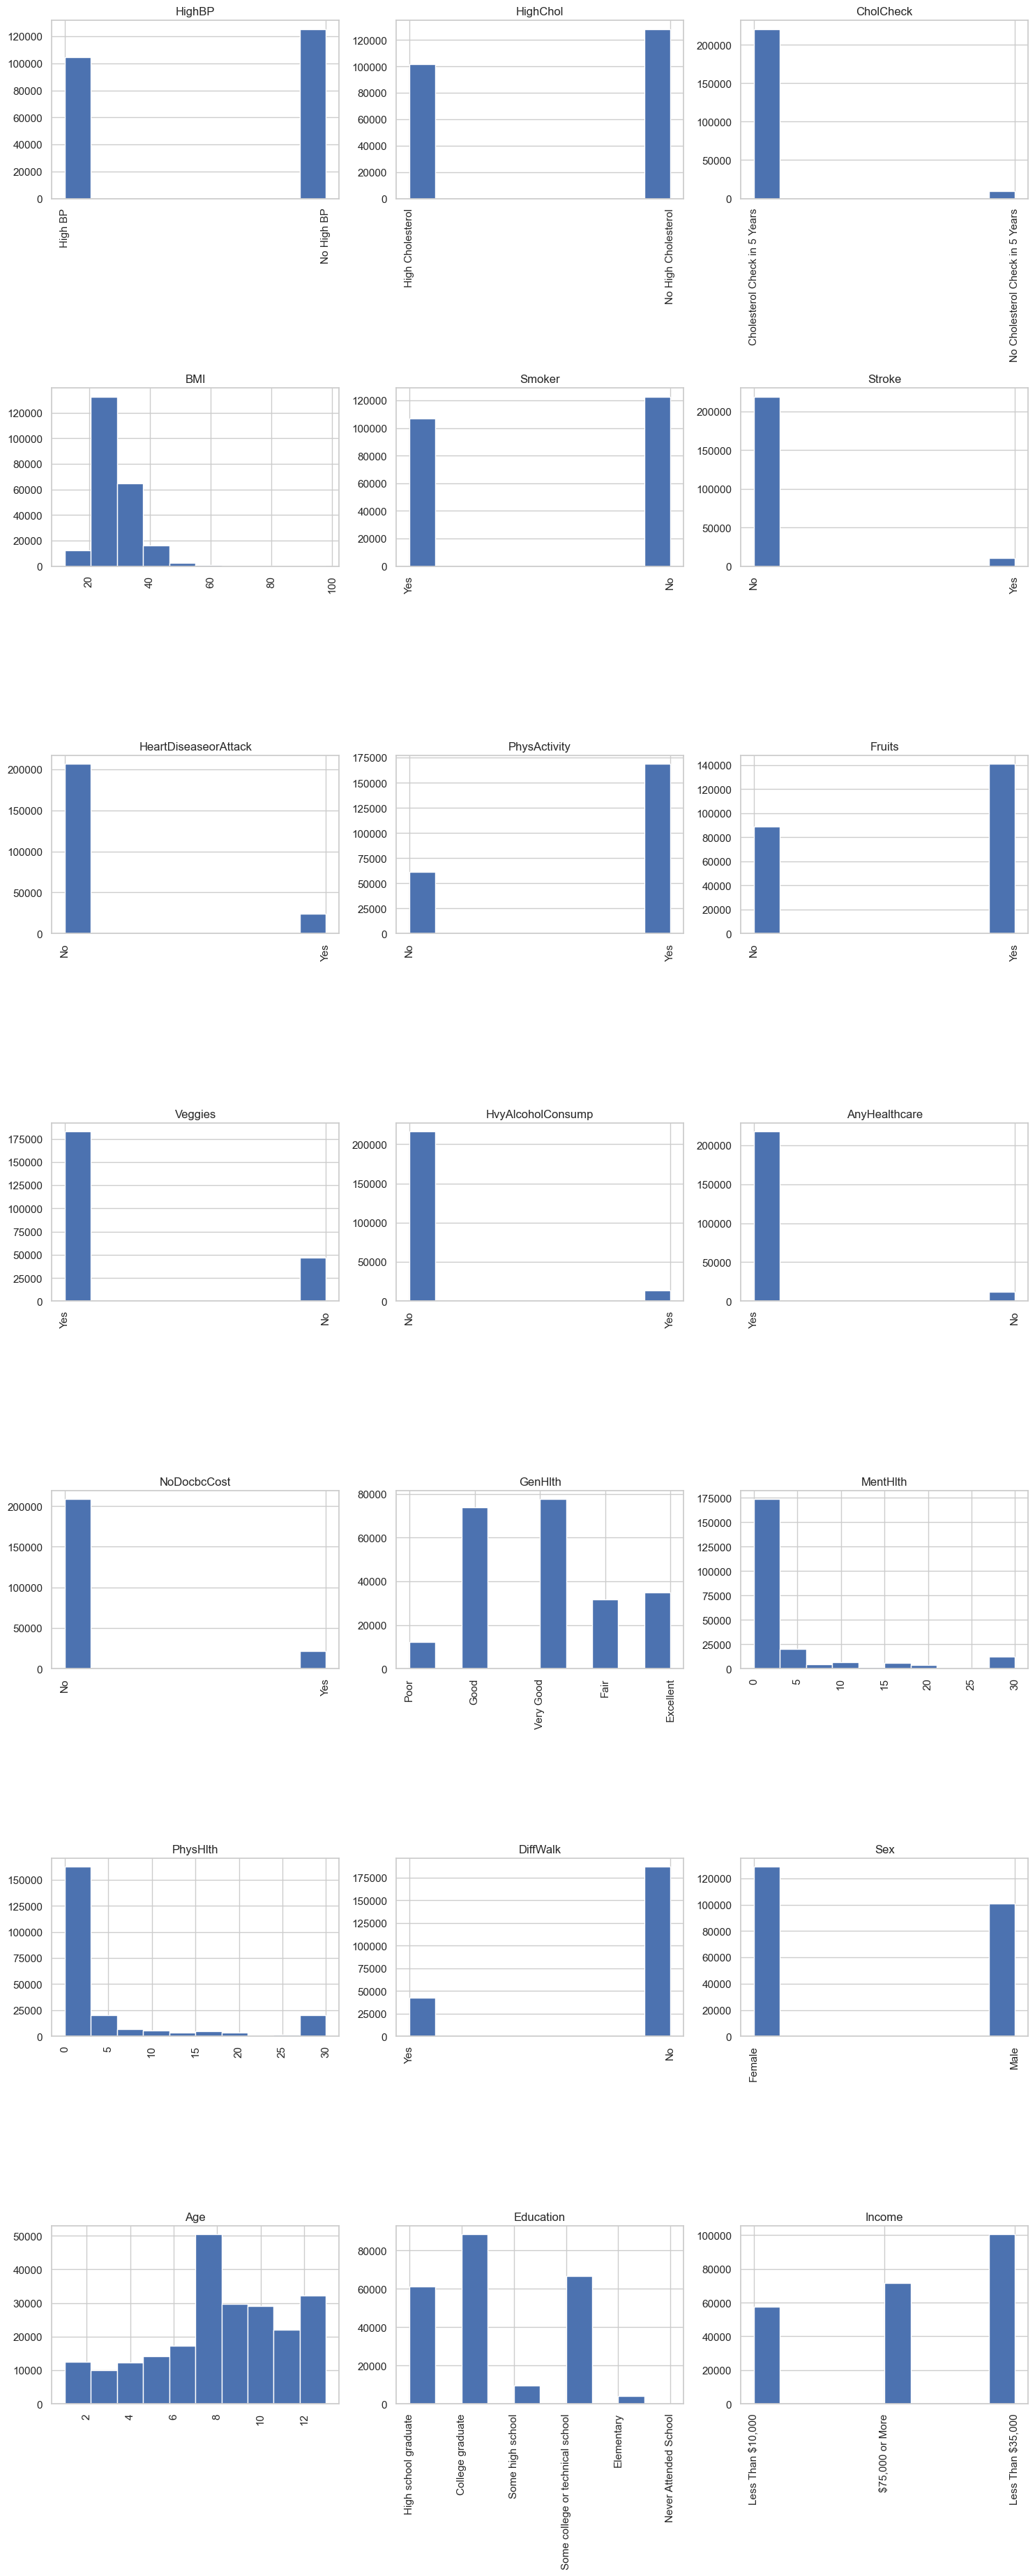

In [215]:
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

# Соотношение сахарного диабета в датасете с их типами

In [216]:
df_vis['Diabetes_012'].value_counts()

Diabetes_012
No Diabetes     190055
Diabetes         35097
Pre Diabetes      4629
Name: count, dtype: int64

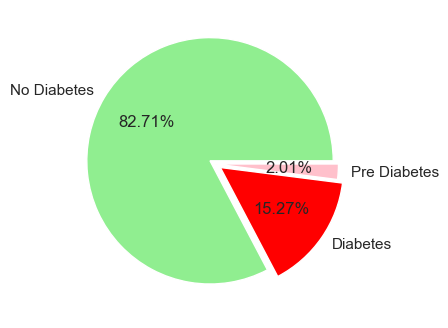

In [217]:
# pie plot of diabetes ratio 
plt.figure(figsize=(6,4))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df_vis['Diabetes_012'].value_counts()[0], df_vis['Diabetes_012'].value_counts()[1], df_vis['Diabetes_012'].value_counts()[2]]
colors = ['lightgreen', 'red', 'pink']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%', colors=colors, data = df_vis);

# Корреляция с Diabetes_012 через гистограмму

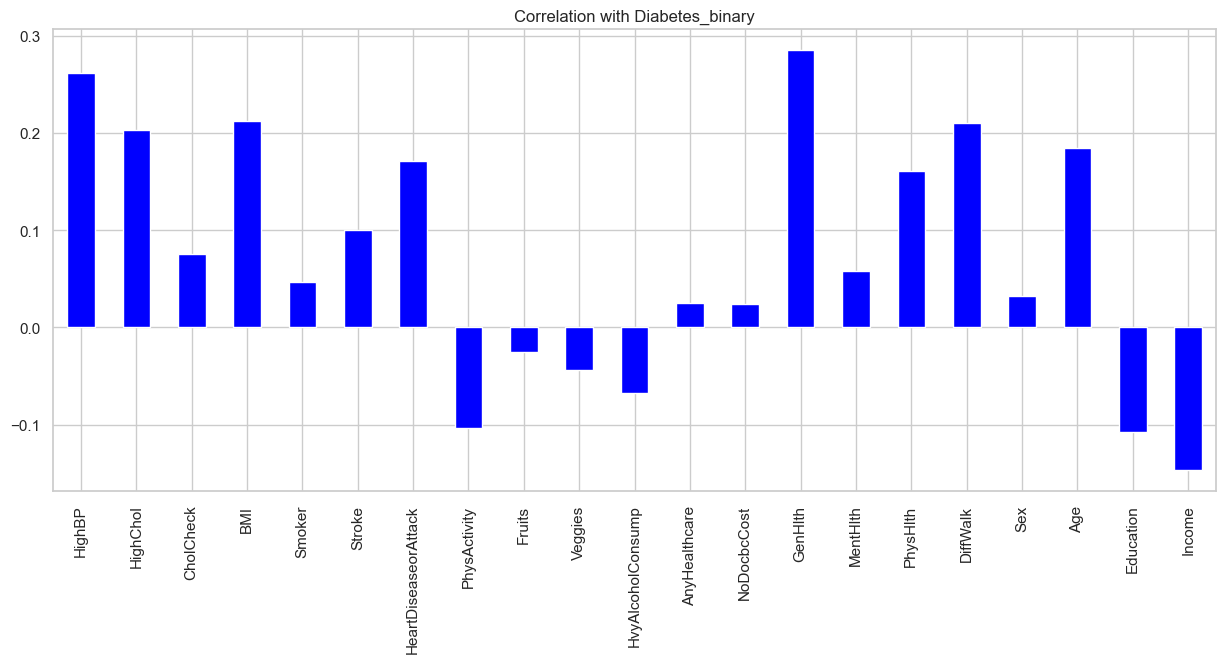

In [218]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

# Выводы: Связь Diabetes_binary с другими столбцами в результате гистограммы:
1: Фрукты, AnyHealthcare, NoDocbccost и пол наименее коррелируют с Diabetes_binary.
2. Высокий уровень АД, холестерина , ИМТ , курение , инсульт, сердечные заболевания или приступы, Физическая активность, Овощи, употребление алкоголя.

# Распределение сахарного диабета среди мужчин и женщин //  Вывод: пол не имеет особого влияния

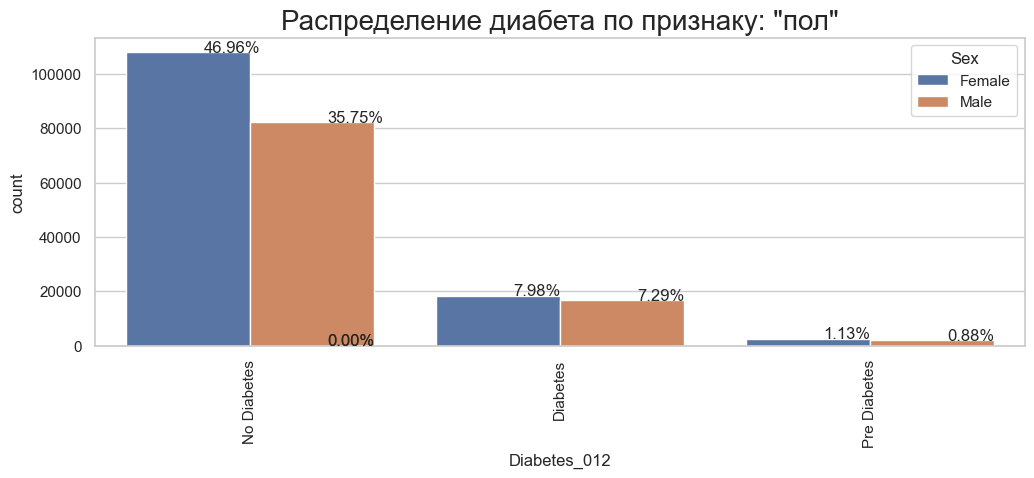

In [219]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=df_vis,hue='Sex')
plt.xticks(rotation=90)
plt.title('Распределение диабета по признаку: "пол"',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Курение

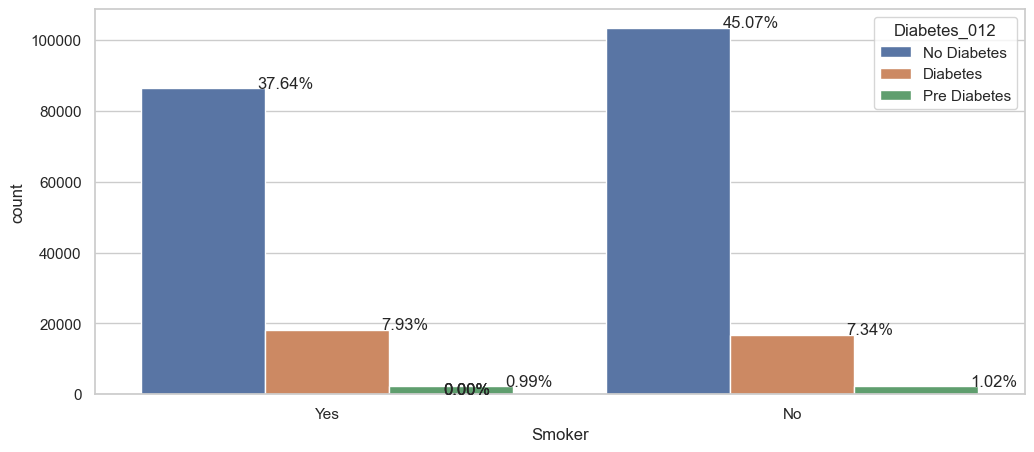

In [220]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Частое употребление алкоголя

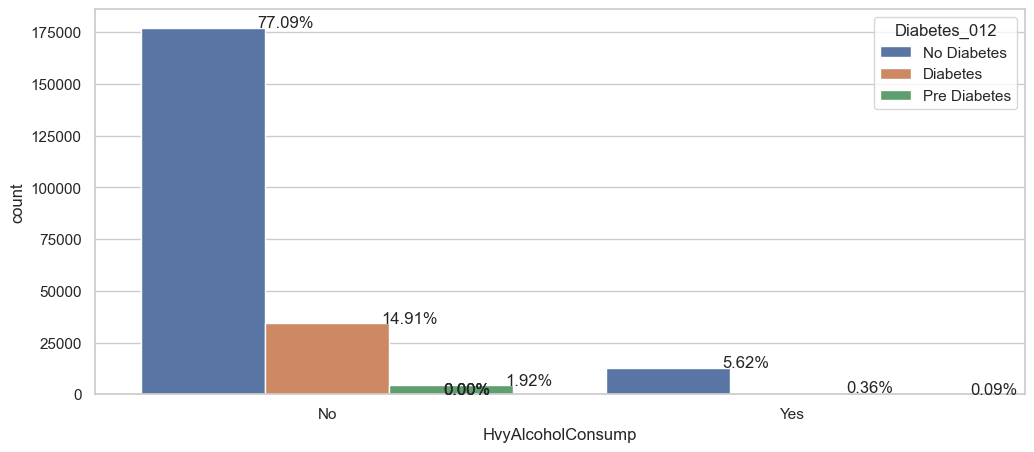

In [221]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# По-отдельности курение и алкоголь не оказывают сильного влияния на диабет. Проверим их совместную значимость

Text(0.5, 1.0, 'Взаимосвязь по признакам: Курение, Алкоголь и Диабет')

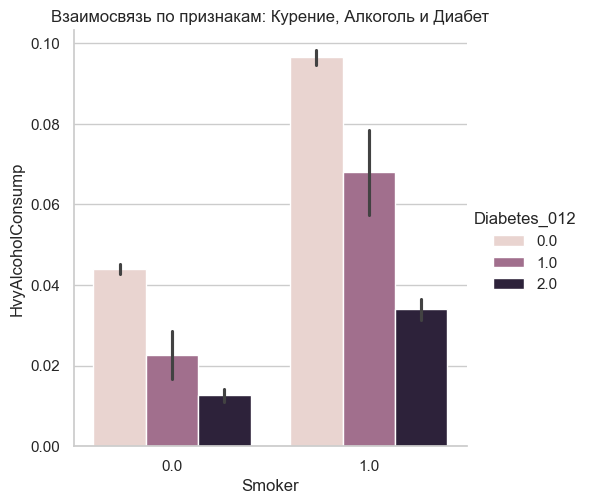

In [222]:
# (1 in Smoker, HvyAlcoholConsump is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_012"  , kind="bar"  );  
plt.title("Взаимосвязь по признакам: Курение, Алкоголь и Диабет")

# Результат: Согласно этим данным, одновременно курение и употребление большого количества алкоголя повышают риск диабета.

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

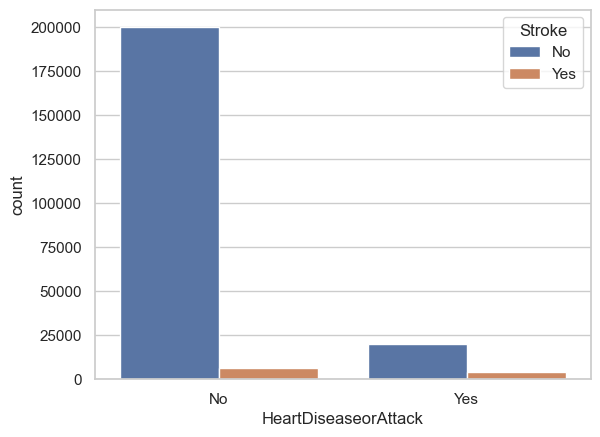

In [223]:
sns.countplot(data=df_vis,x='HeartDiseaseorAttack',hue='Stroke')

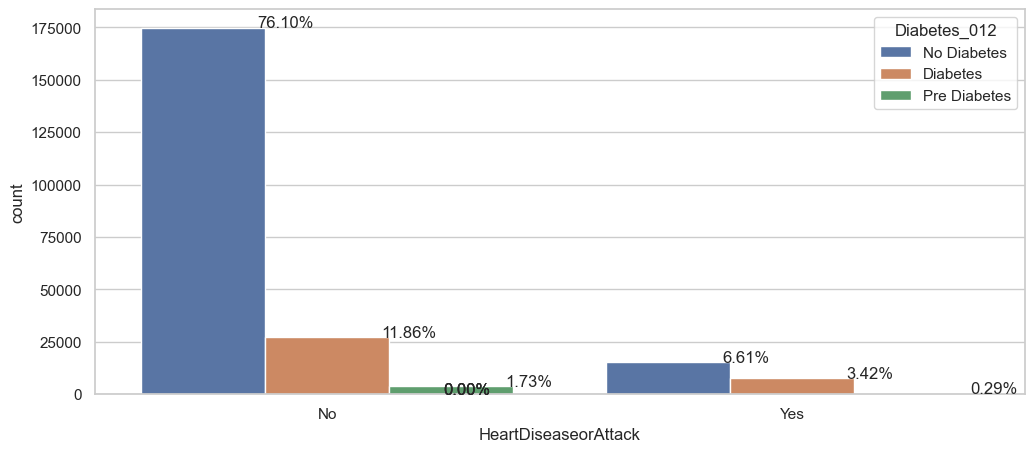

In [224]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


# Вероятность развития диабета возрастает по мере того, как у человека возникают сердечные заболевания или приступы

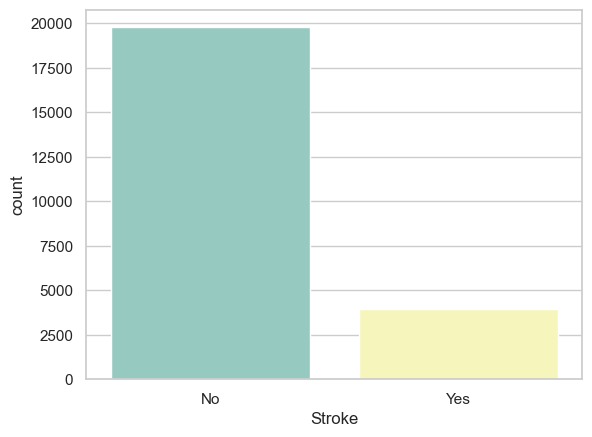

In [225]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['HeartDiseaseorAttack']=="Yes"],x='Stroke',palette='Set3');

# Инфаркт повышает риск Инсульта. Проверим их совместное влияние на Диабет

Text(0.5, 1.0, 'Совместное влияние Инсульта и Инфаркта на Диабет')

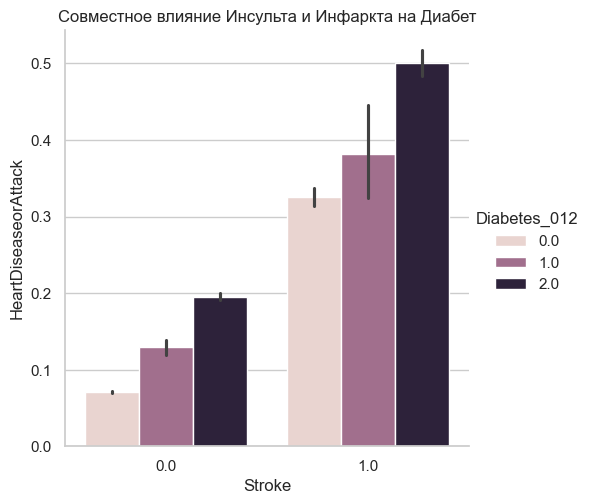

In [226]:
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_012"  , kind="bar"  );
plt.title("Совместное влияние Инсульта и Инфаркта на Диабет")

# Вывод: инсульт и сердечные заболевания вместе повышают риск развития диабета

# Влияние поывшенного давления

<Axes: xlabel='Diabetes_012', ylabel='count'>

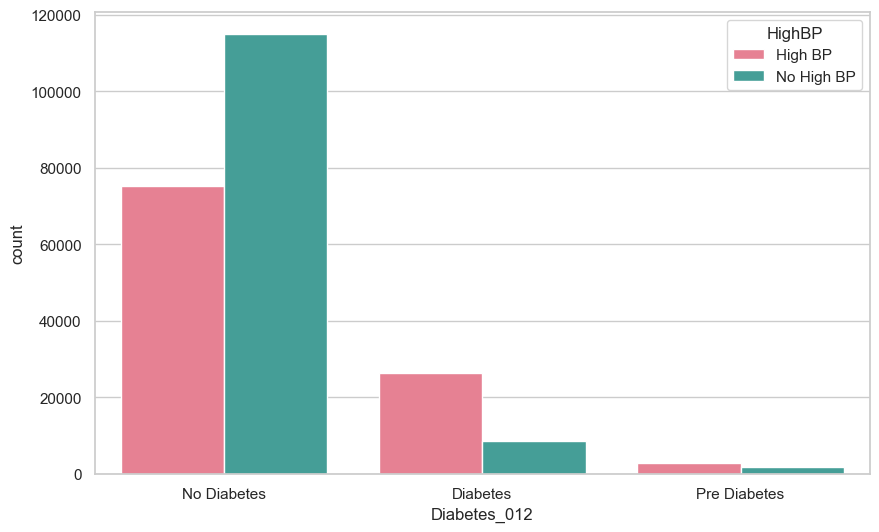

In [227]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighBP',palette='husl')

# sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#5aef1')

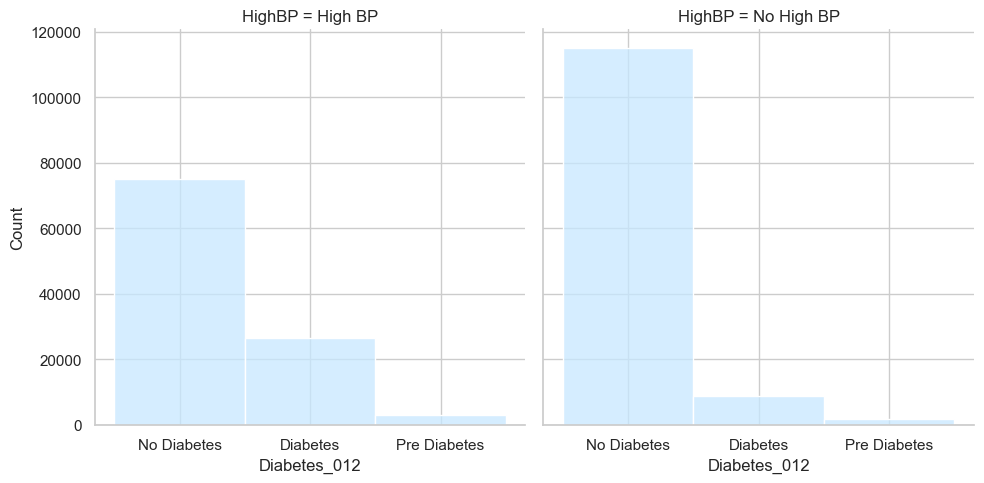

In [228]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#c7e8ff')

# Высокий уровень холестерина

<Axes: xlabel='Diabetes_012', ylabel='count'>

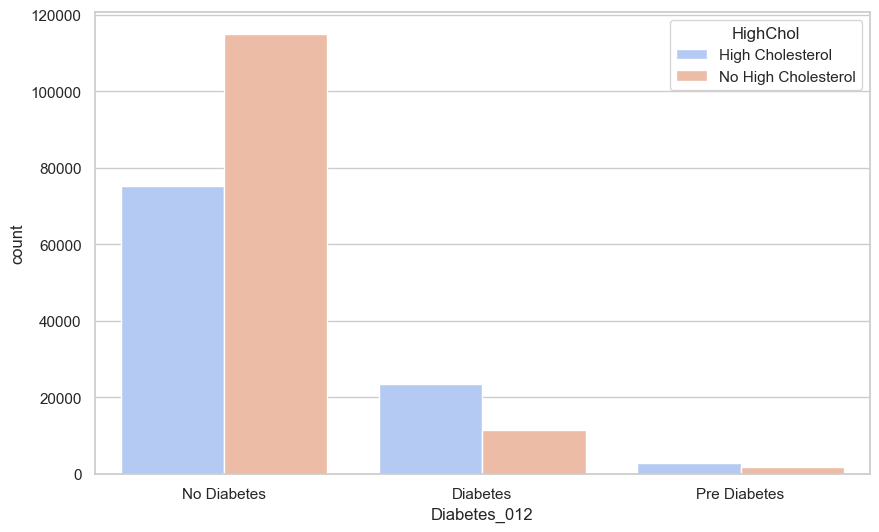

In [229]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighChol',palette='coolwarm')

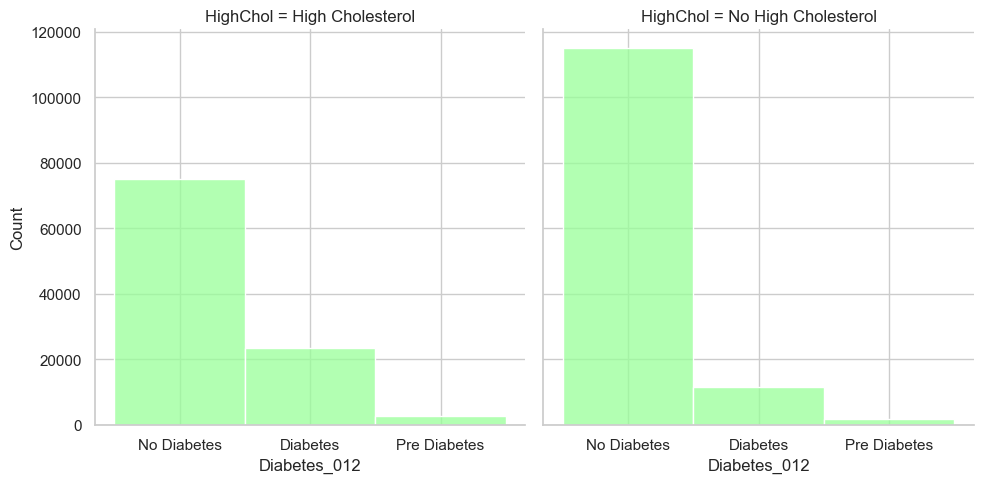

In [230]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighChol',color='#98ff98')

# Выводы: диабетики, как правило, имеют высокое кровяное давление и повышенный уровень холестерина. Проверим их совместное влияние на диабет.

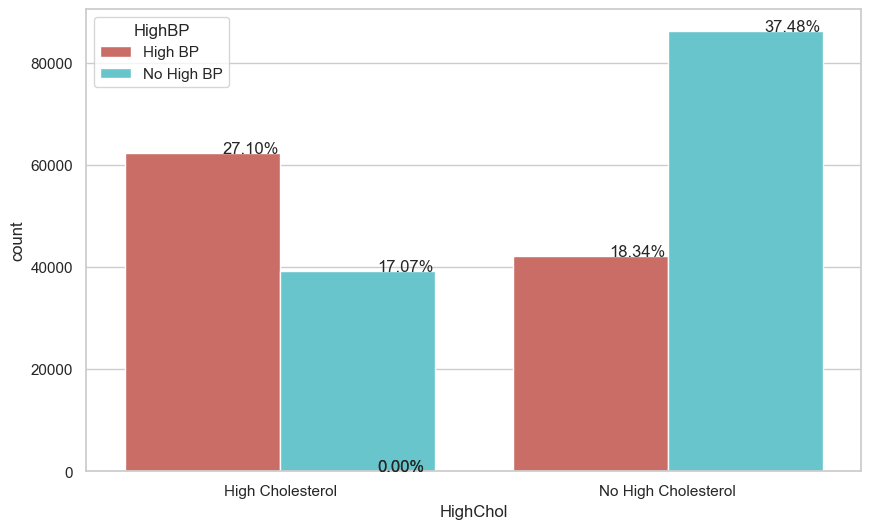

In [231]:
# HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=df_vis,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/df_vis.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# высокий уровень холестерина и высокое кровяное давление тесно связаны друг с другом, поскольку люди с высоким уровнем холестерина, как правило, имеют высокое кровяное давление.
Связь между высоким BP и высоким уровнем холестерина идет в обоих направлениях. Когда организм не может вывести холестерин из кровотока, этот избыток холестерина может откладываться на стенках артерий. Когда артерии становятся жесткими и сужаются из-за отложений, сердцу приходится работать более интенсивно, чтобы прокачивать по ним кровь. Это приводит к тому, что кровяное давление все более повышается.

# Проверка комбинированного влияния HighBP и HighChol на диабет

Text(0.5, 1.0, 'Комбинированное влияние HighBP и HighChol на диабет')

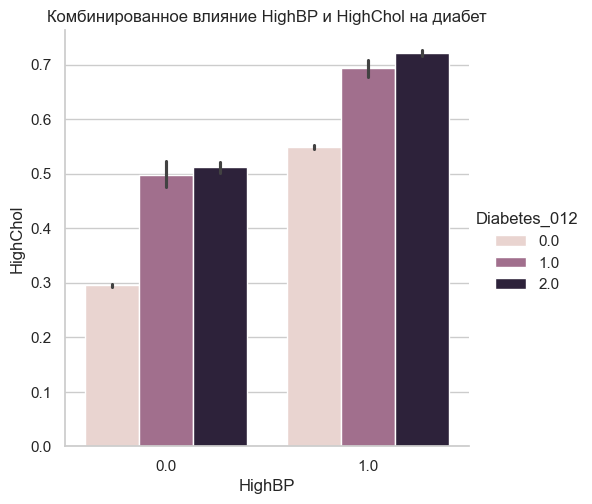

In [232]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Комбинированное влияние HighBP и HighChol на диабет")

# вывод: высокий уровень АД и высокий уровень холестерина одновременно повышают риск развития диабета.

# BMI - Индекс массы тела

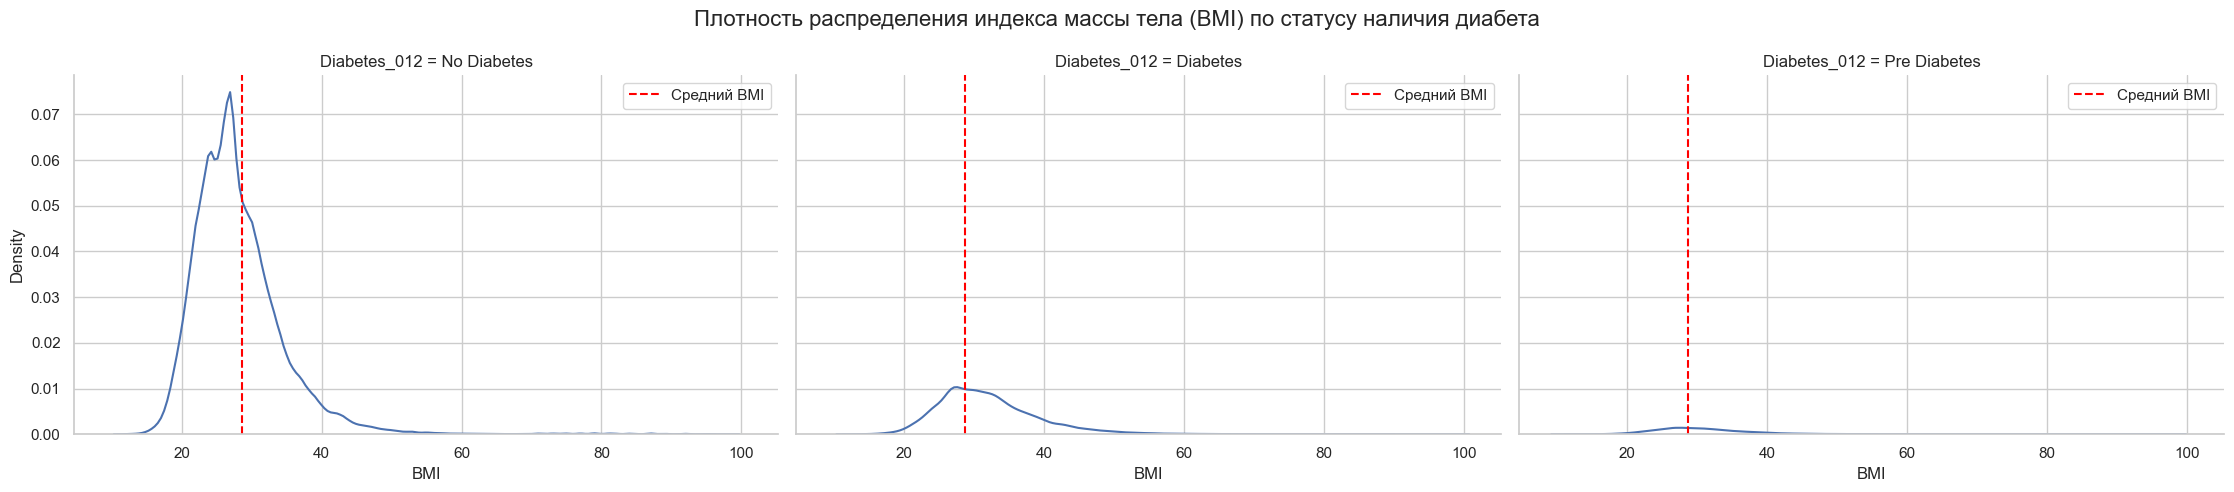

In [233]:
# Установка стиля
sns.set(style="whitegrid")

# Создание графика
g = sns.displot(x='BMI', col='Diabetes_012', data=df_vis, kind="kde", palette="pastel", height=5, aspect=1.5)

# Добавление заголовка
g.fig.suptitle("Плотность распределения индекса массы тела (BMI) по статусу наличия диабета", fontsize=16)
plt.subplots_adjust(top=0.85)  # Увеличьте пространство для заголовка

# Добавление вертикальной линии для среднего значения
mean_bmi = df_vis['BMI'].mean()
for ax in g.axes.flat:
    ax.axvline(mean_bmi, color='red', linestyle='--', label='Средний BMI')
    ax.legend()

plt.show()

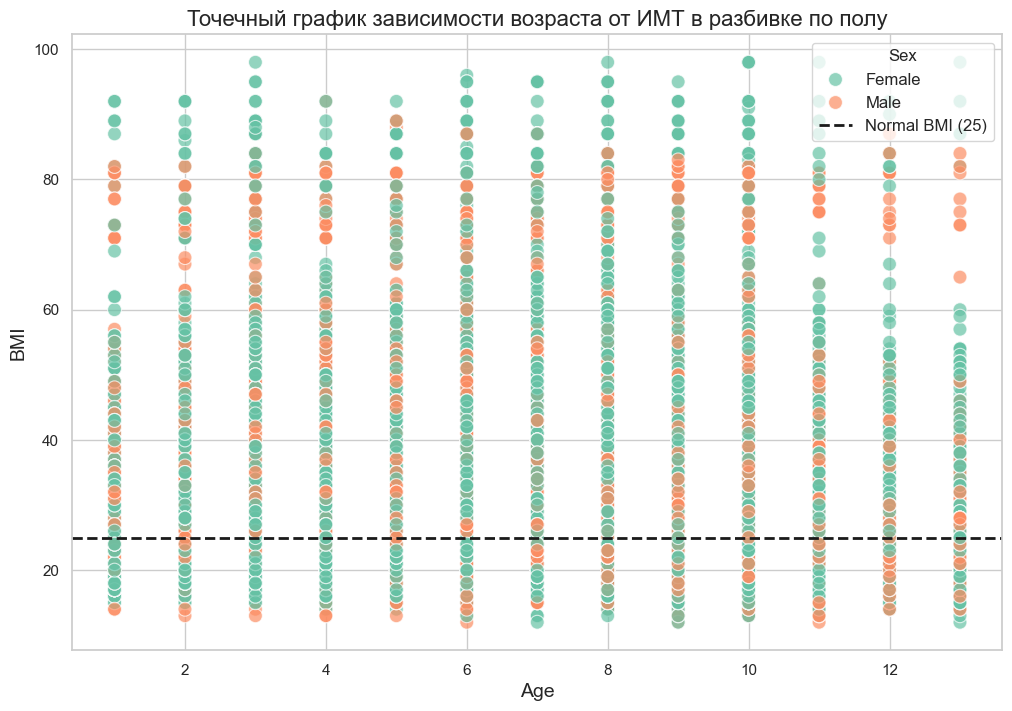

In [234]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=df_vis, x='Age', y='BMI', hue='Sex', palette='Set2', s=100, alpha=0.7)

plt.axhline(y=25, linewidth=2, color='k', linestyle='--', label='Normal BMI (25)')

# titles and labels
plt.title("Точечный график зависимости возраста от ИМТ в разбивке по полу", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("BMI", fontsize=14)

plt.legend(title='Sex', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

# Вывод: большинство людей из датасета имеют BMI выше нормы (25)

# Разделим людей на группы по BMI (Вес ниже нормы, Нормальный вес, Избыточный вес, Ожирение)

In [235]:
BMI=pd.cut( data['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [236]:
dd=pd.crosstab(df_vis['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(int)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,169,5350,11419,18118
No Diabetes,2856,67462,68505,50998
Pre Diabetes,28,924,1631,2042


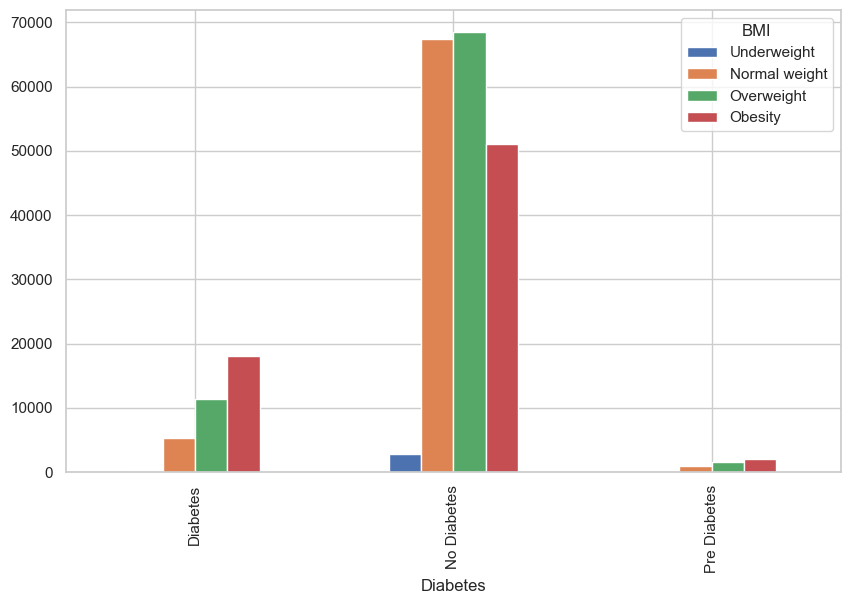

In [237]:
dd.plot(kind="bar",figsize=(10,6));

# Возраст. Поделим по группам

In [238]:
age = pd.cut(df_vis['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229781, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 800x600 with 0 Axes>

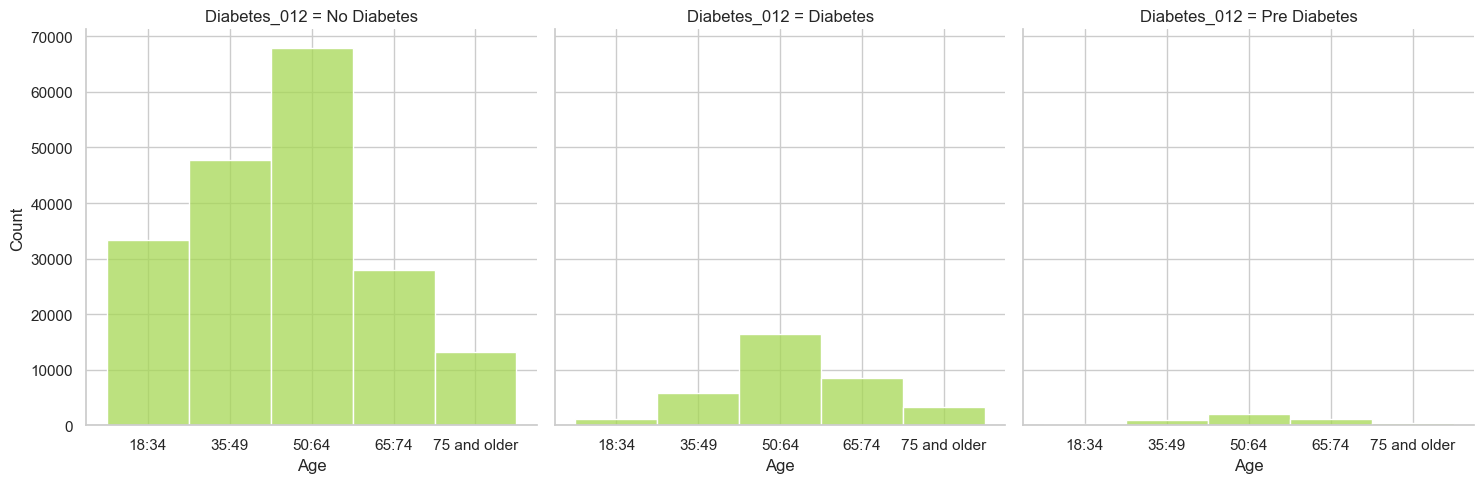

In [239]:
plt.figure(figsize=(8,6))
sns.displot(data=df_vis,col='Diabetes_012',x=age,color='#a6d854');

# Люди в возрасте от 50 до 64 лет имеют более высокий риск развития диабета

# PhysHlth

<Figure size 1200x500 with 0 Axes>

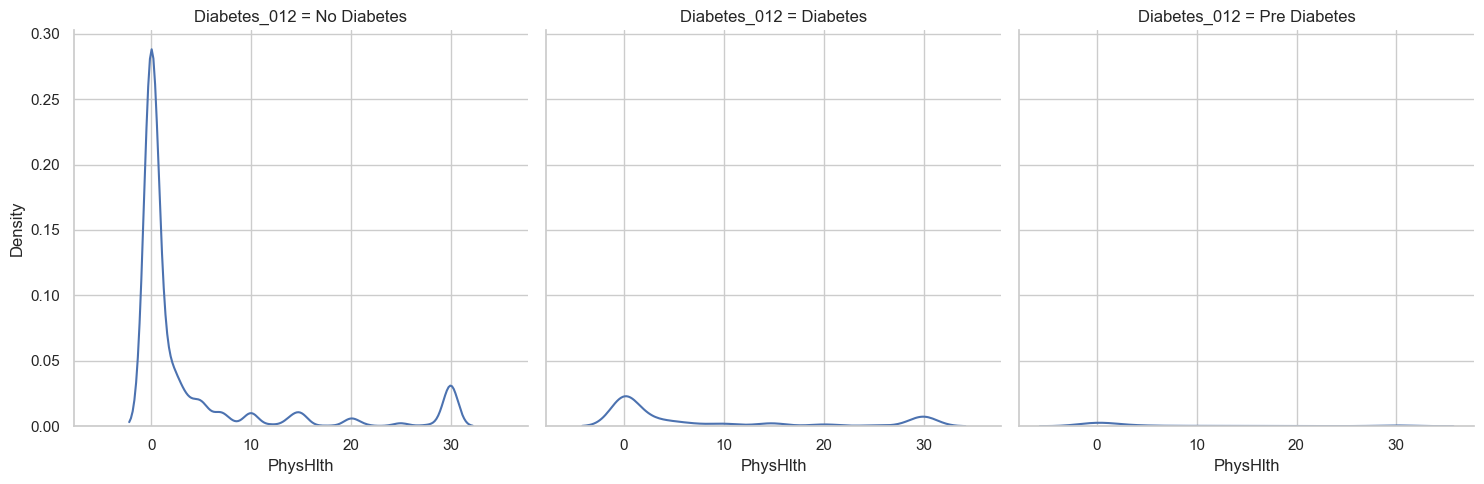

In [240]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

# MentHlth

<Figure size 1200x500 with 0 Axes>

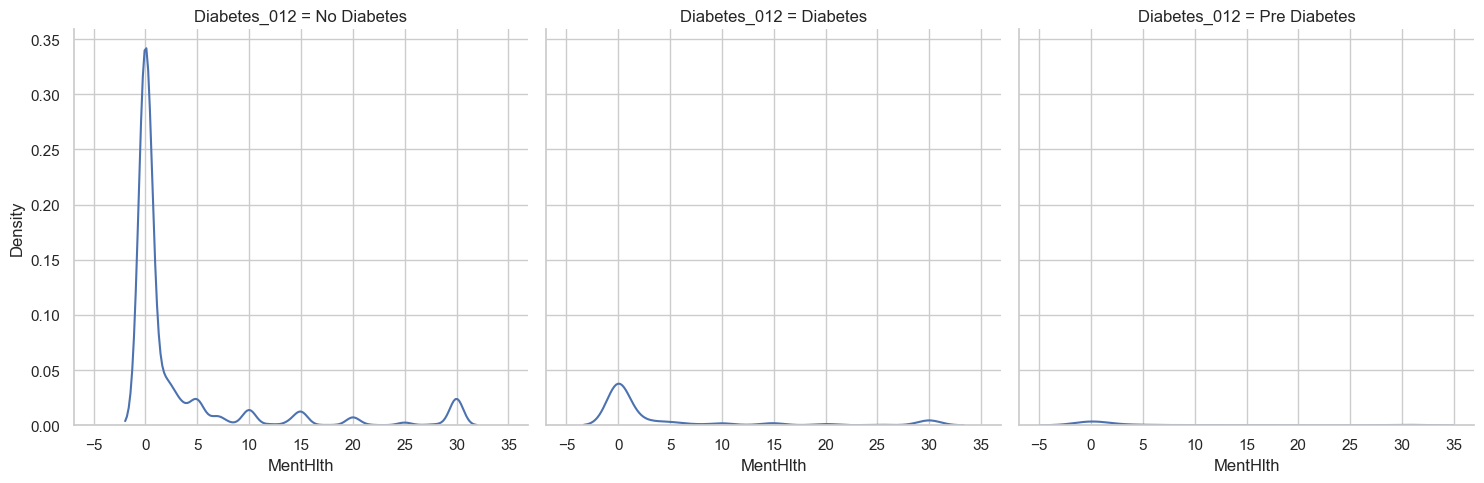

In [241]:
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_012', data = df_vis, kind="kde")
plt.show()

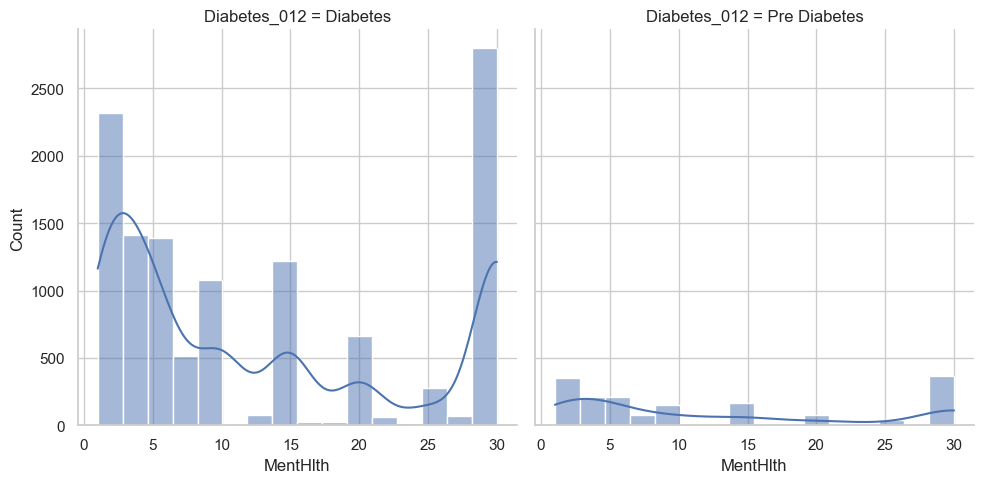

In [242]:
sns.displot(data=df_vis.loc[(df_vis['MentHlth']>0)&(df_vis['Diabetes_012']!="No Diabetes")],x='MentHlth',col='Diabetes_012',col_wrap=2,kde=True);

# Психическое здоровье не влияет на диабет

# GenHlth

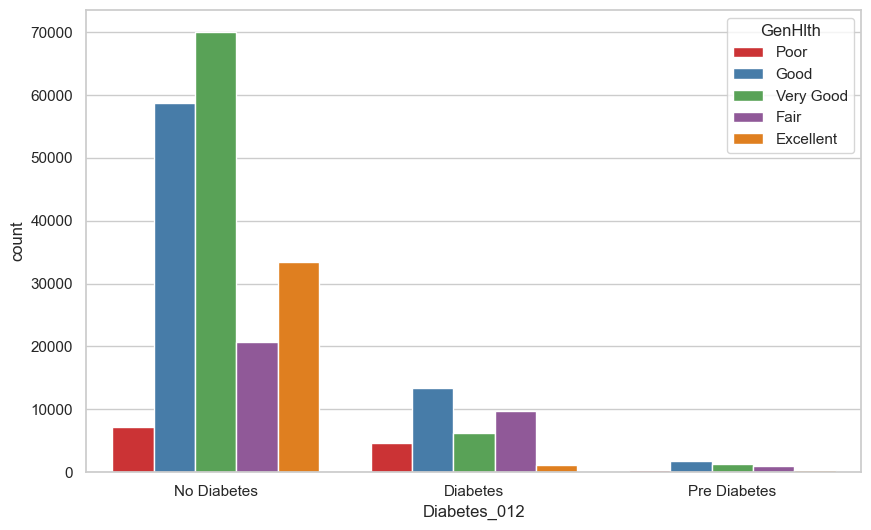

In [243]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='GenHlth',palette='Set1');

# Общее здоровье оказывает влияние на диабет

# Income ( не оказывает)

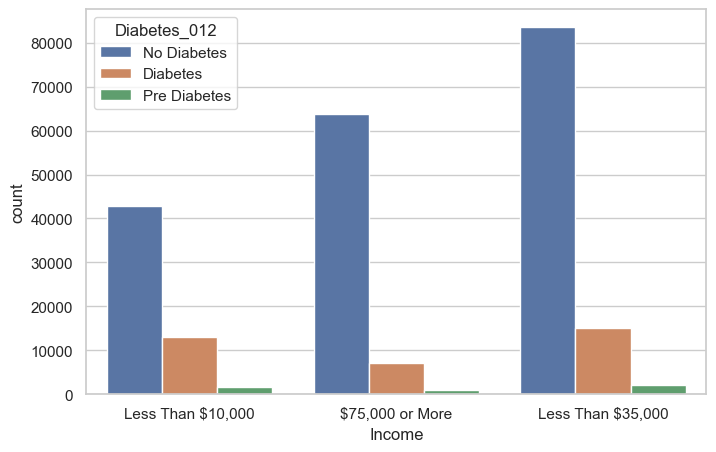

In [244]:
plt.figure(figsize=(8,5))
sns.countplot(x='Income', hue='Diabetes_012' , data = df_vis)
plt.show()

<Figure size 1000x600 with 0 Axes>

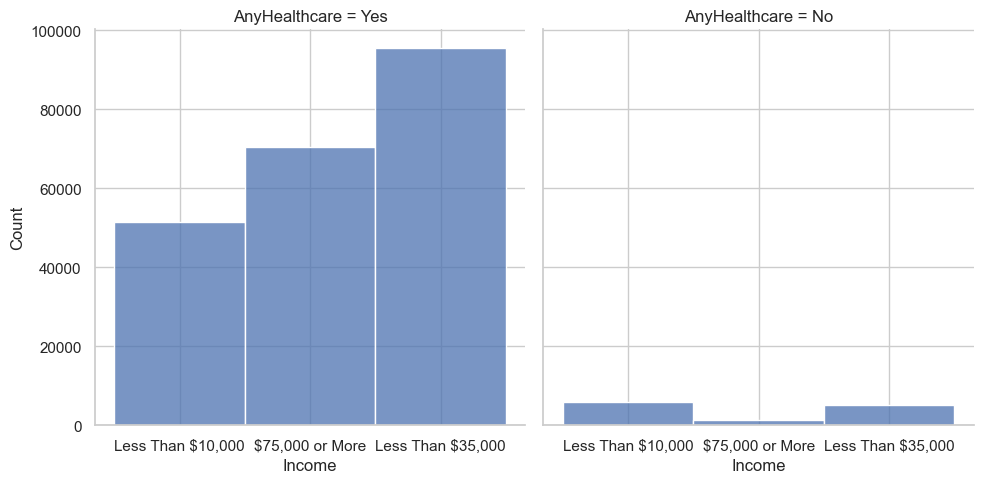

In [245]:
# Влияние дохода на обращение за мед.услугами . Вывод:чем больший доход, тем больше хорошее медицинское обслуживание
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,x='Income',col='AnyHealthcare');

# Education Образование

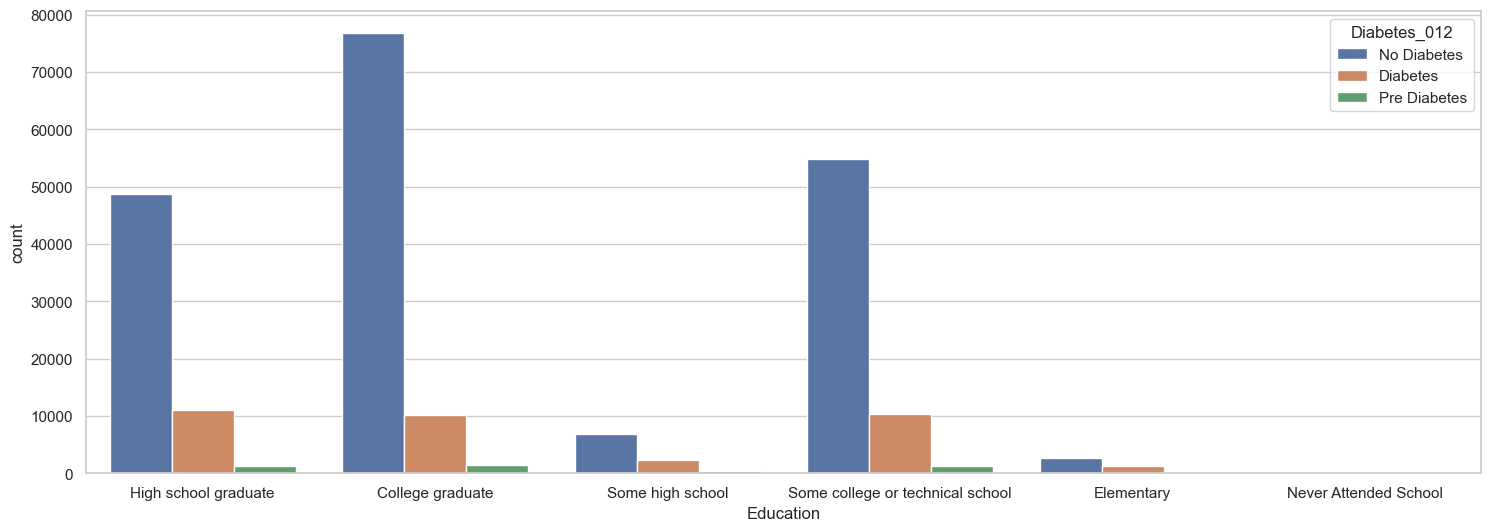

In [246]:
plt.figure(figsize=(18,6))
sns.countplot(x='Education', hue='Diabetes_012' , data = df_vis)
plt.show()

# Veggies

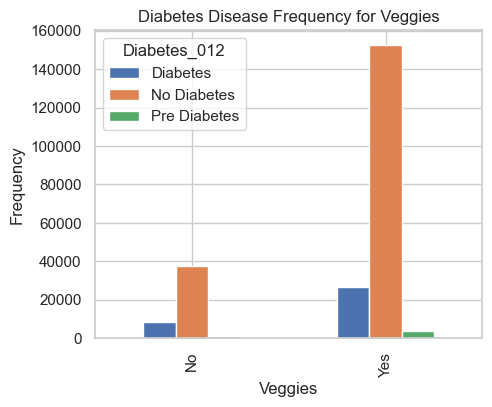

In [247]:
pd.crosstab(df_vis.Veggies,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

# Fruits

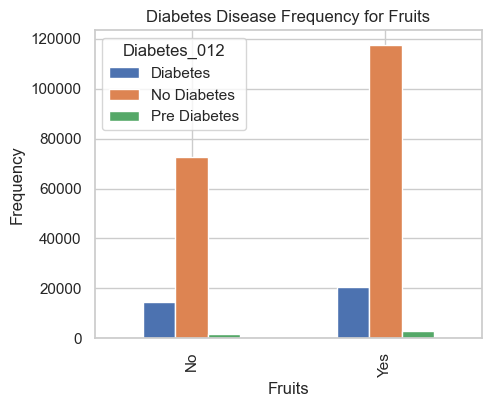

In [248]:
pd.crosstab(df_vis.Fruits,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

# PhysActivity

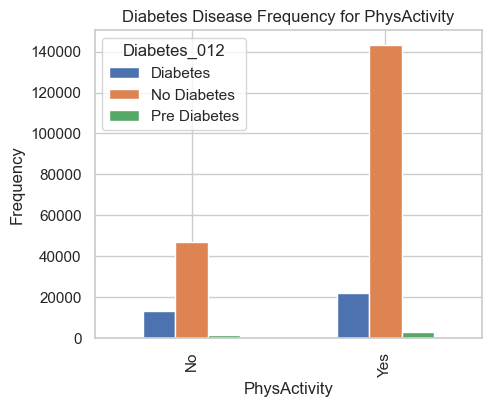

In [249]:
pd.crosstab(df_vis.PhysActivity,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='PhysActivity', ylabel='count'>

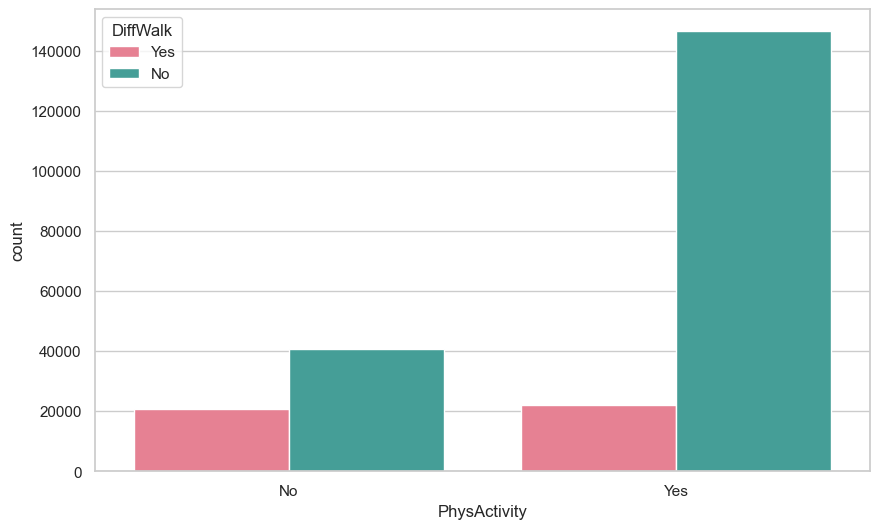

In [250]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_vis,x=df_vis['PhysActivity'],hue='DiffWalk',palette='husl')

<Figure size 1400x600 with 0 Axes>

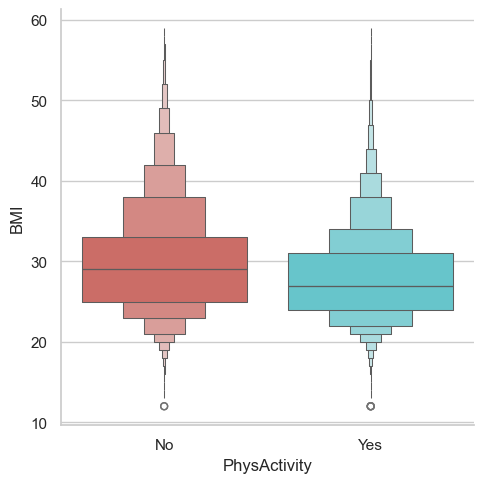

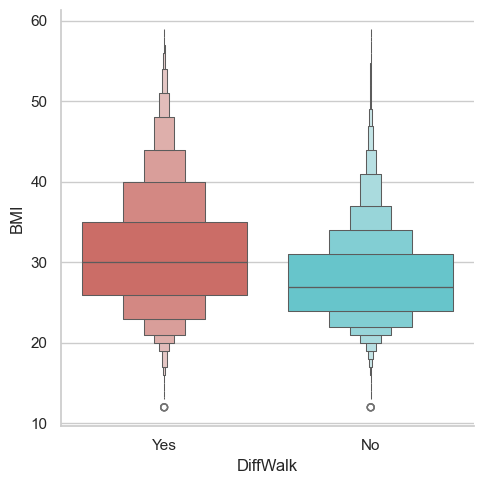

In [251]:
plt.figure(figsize = (14,6))
# plt.subplot(1, 1, 1)
x=sns.catplot(data=df_vis[df_vis['BMI']<60],x="PhysActivity", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

y=sns.catplot(data=df_vis[df_vis['BMI']<60],x="DiffWalk", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()


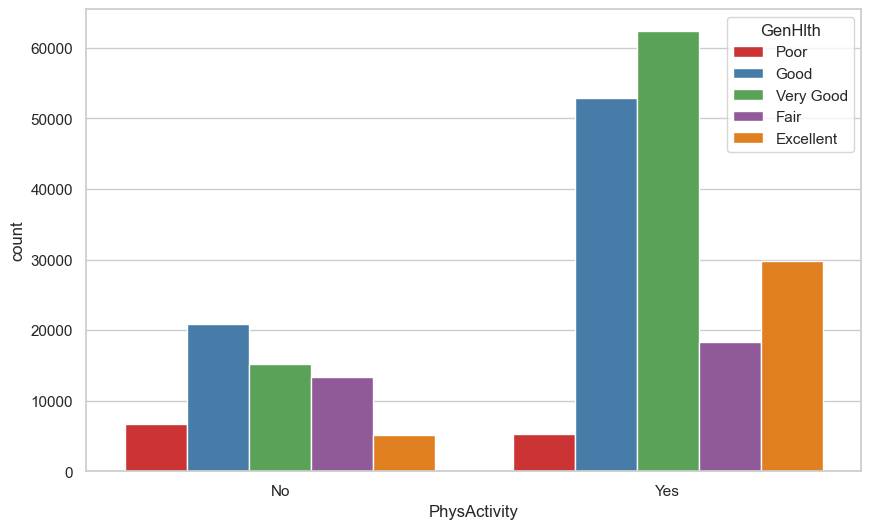

In [252]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='PhysActivity',hue='GenHlth',palette='Set1');

# Вывод: физическая активность влияет на общее здоровье, поскольку люди, занимающиеся физическими упражнениями, имеют намного лучшее общее состояние здоровья

# Итоги по визуализации:
1: мужчины и женщины одинаково уязвимы для диабета.
2: люди старше 45 лет более уязвимы для диабета, чем молодые.с увеличением возраста увеличивается и число людей, страдающих диабетом.
3. Более половины диабетиков страдают ожирением, почти половина преддиабетиков страдают ожирением.
4. процент диабетиков и преддиабетиков, страдающих ожирением и избыточным весом, намного выше, чем процент недиабетиков, страдающих ожирением и избыточным весом
5: когда уровень образования повышается, число людей, страдающих диабетом, сокращается.
6: у людей с более низким доходом риск развития диабета выше, чем у людей с более высоким доходом.
7: питание оказывает влияние (потребление овощей и фруктов снижает риск диабета)
8: Физическая активность снижает риск развития диабета.


# Preprocessing // Предварительная подготовка данных

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

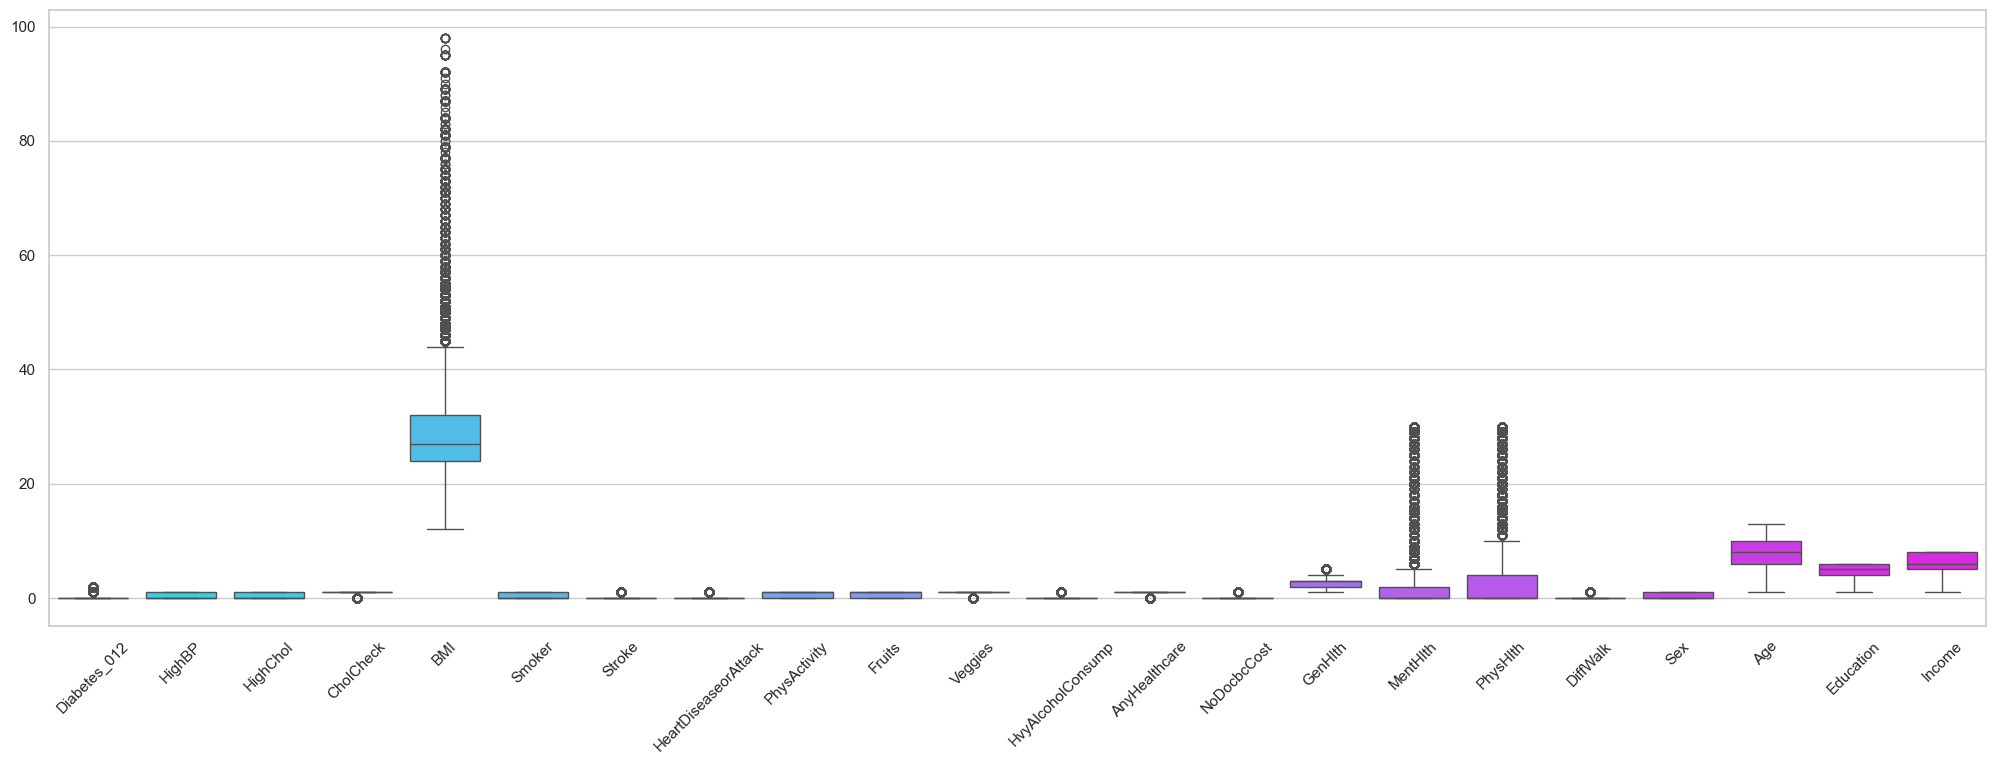

In [253]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

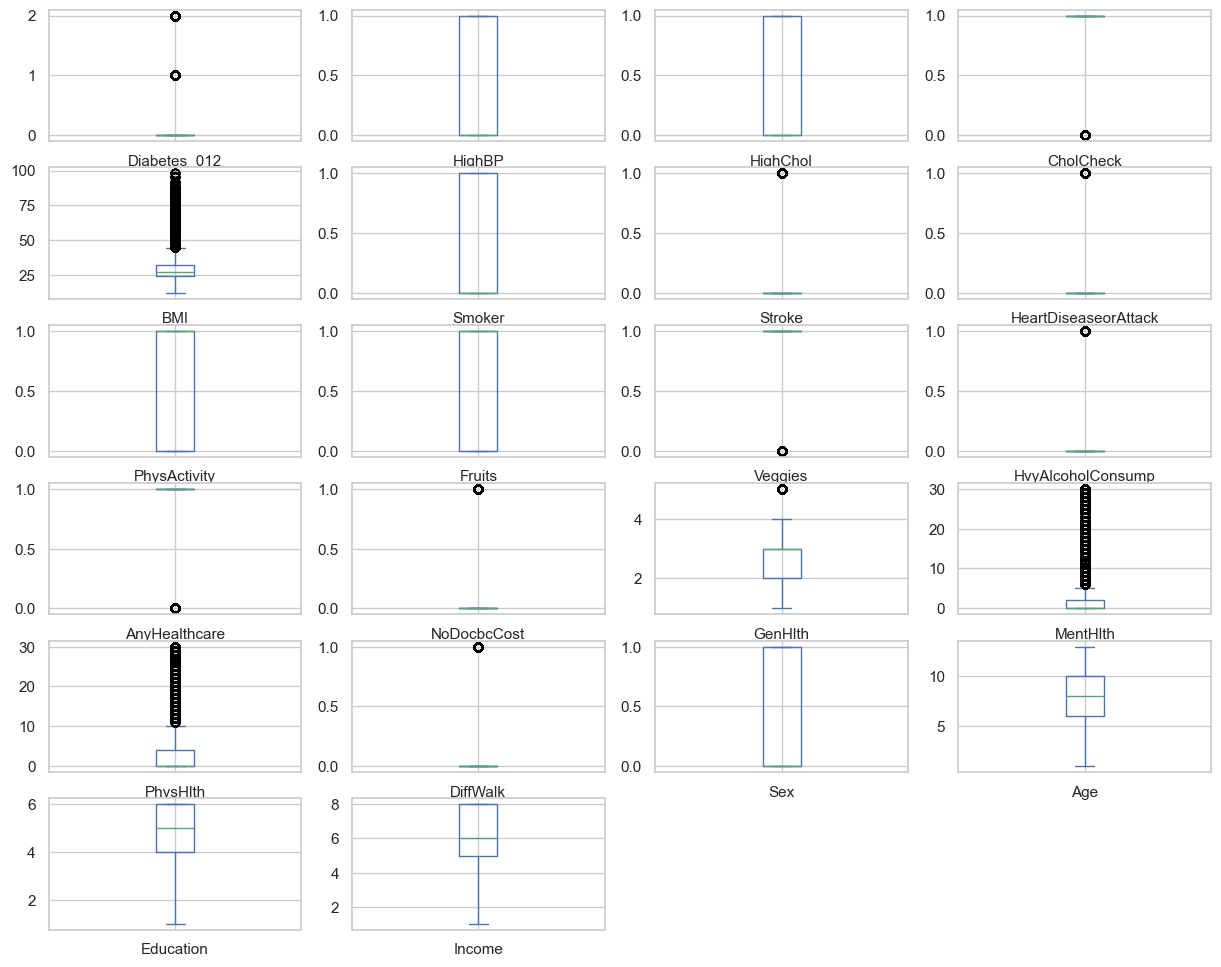

In [254]:
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

# Рассмотрим выбросы по BMI

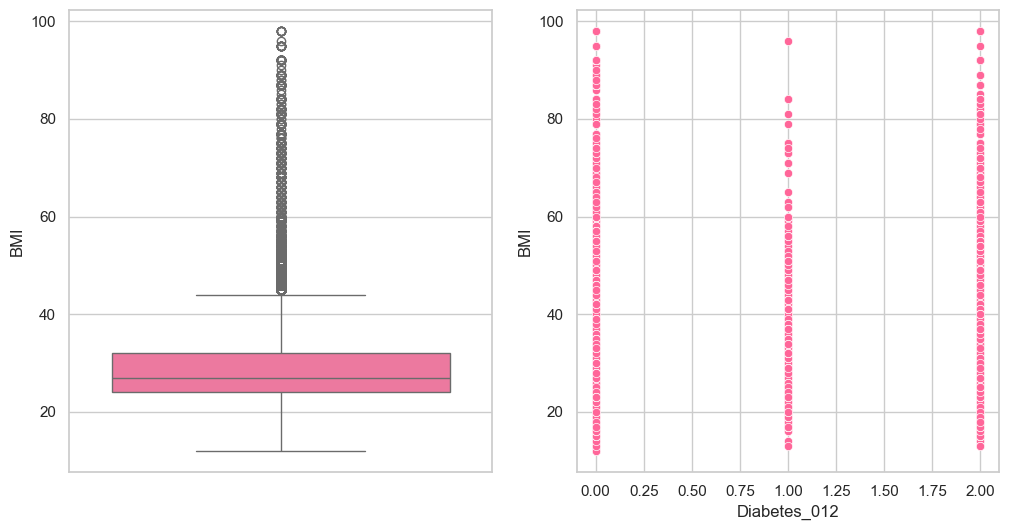

In [255]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#ff6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#ff6699')
plt.show()

In [256]:
x=data[data['BMI']>=70]
x.shape

(599, 22)

In [257]:
df=data.copy()

In [258]:
df=data[data['BMI']<70]

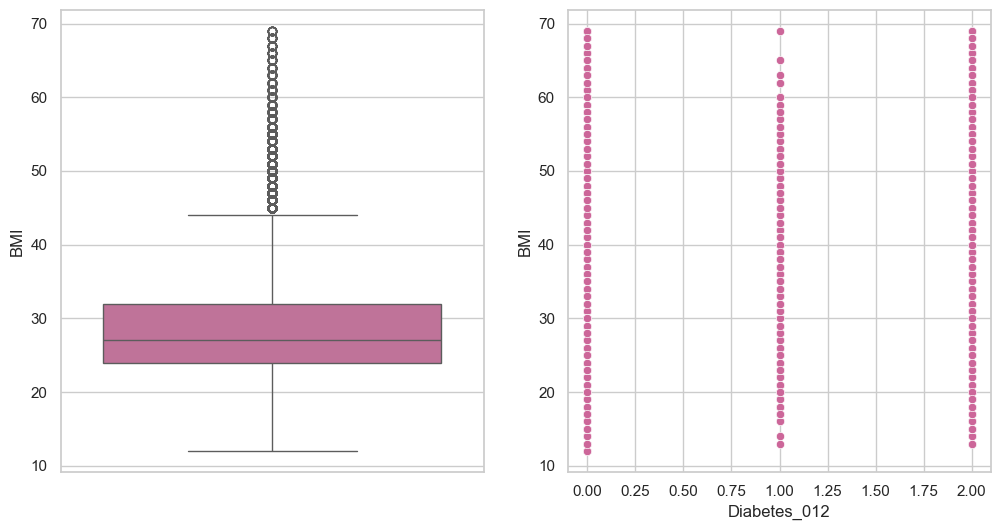

In [259]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [260]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    189549
2.0     35016
1.0      4617
Name: count, dtype: int64

# Займемся определением выбросов

In [261]:
from sklearn.ensemble import IsolationForest # Импортируем класс IsolationForest из библиотеки sklearn.ensemble
model = IsolationForest() # Создаем экземпляр модели IsolationForest

# Обучаем модель на данных из DataFrame df
model.fit(df)

# Вычисляем аномальные оценки для каждого наблюдения в df
# df['anomailes_scores'] = model.decision_function(df)

# Предсказываем аномалии в данных: 1 - нормальные, -1 - аномальные
df['anomaly'] = model.predict(df)

In [262]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,-1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,-1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,1
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,1


# Исключим аномалии (-1)

In [263]:
df[df['anomaly']==-1] # выберем аномалии (каждый раз их колич.меняется)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,-1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,-1
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,-1
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,-1
253671,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0,-1
253672,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0,-1
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1


In [264]:
df[df['anomaly']==-1].shape

(80892, 23)

In [265]:
df.drop(df[df['anomaly']==-1].index,inplace = True)

In [266]:
df.shape

(148290, 23)

In [267]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,1
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,1
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0,1
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1


# Drop column(anomaly)

In [268]:
df.drop(columns=['anomaly'], inplace=True)

In [269]:
df.shape

(148290, 22)

# Масштабирование данных (Scaling data)

In [270]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [272]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.292291,-0.798139,0.156633,-0.116261,-0.827866,-0.08887,-0.175543,0.446280,0.699300,0.388136,-0.19509,0.113347,-0.158632,-0.284017,-0.361135,-0.371090,-0.210098,-0.871500,1.002092,-2.457427,-0.285176
1,1.292291,1.252914,0.156633,-0.688968,-0.827866,-0.08887,-0.175543,0.446280,0.699300,0.388136,-0.19509,0.113347,-0.158632,-0.284017,0.336987,-0.371090,-0.210098,-0.871500,1.002092,-0.197326,-1.450668
2,1.292291,1.252914,0.156633,-0.498066,1.207925,-0.08887,-0.175543,0.446280,0.699300,0.388136,-0.19509,0.113347,-0.158632,-0.284017,-0.361135,0.078313,-0.210098,1.147446,0.676794,0.932724,0.880316
3,1.292291,1.252914,0.156633,-0.498066,1.207925,-0.08887,-0.175543,0.446280,-1.430002,0.388136,-0.19509,0.113347,-0.158632,0.913779,-0.361135,-0.371090,4.759673,-0.871500,1.002092,-1.327377,-1.450668
4,-0.773820,-0.798139,0.156633,-0.688968,-0.827866,-0.08887,-0.175543,-2.240748,-1.430002,0.388136,-0.19509,0.113347,-0.158632,-0.284017,-0.361135,-0.371090,-0.210098,1.147446,0.026199,-1.327377,-2.033414
5,-0.773820,-0.798139,0.156633,-0.498066,1.207925,-0.08887,-0.175543,0.446280,0.699300,0.388136,-0.19509,0.113347,-0.158632,0.913779,-0.361135,-0.371090,-0.210098,1.147446,1.652687,0.932724,0.880316
6,-0.773820,-0.798139,0.156633,-0.307163,1.207925,-0.08887,-0.175543,-2.240748,-1.430002,0.388136,-0.19509,0.113347,-0.158632,0.913779,-0.361135,2.999428,-0.210098,-0.871500,-0.299099,-0.197326,0.297570
7,1.292291,-0.798139,0.156633,1.029152,-0.827866,-0.08887,-0.175543,0.446280,-1.430002,-2.576414,-0.19509,0.113347,-0.158632,-0.284017,0.802401,-0.371090,-0.210098,-0.871500,-0.624396,0.932724,0.880316
8,1.292291,1.252914,0.156633,-1.261675,-0.827866,-0.08887,-0.175543,0.446280,0.699300,0.388136,-0.19509,0.113347,-0.158632,0.913779,-0.361135,-0.371090,-0.210098,-0.871500,0.676794,-1.327377,-2.033414
9,-0.773820,-0.798139,0.156633,-0.879870,1.207925,-0.08887,-0.175543,0.446280,-1.430002,-2.576414,-0.19509,0.113347,-0.158632,-0.284017,-0.361135,-0.371090,-0.210098,1.147446,-0.299099,-0.197326,-0.285176


In [273]:
# Разделим данные (Split the data)

In [274]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=0, shuffle =True)

In [275]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [276]:
y_pred = knn.predict(x_test)

In [277]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [278]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    135333
2.0     10778
1.0      2179
Name: count, dtype: int64

In [279]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     47404
         1.0       0.00      0.00      0.00       729
         2.0       0.27      0.09      0.13      3769

    accuracy                           0.90     51902
   macro avg       0.40      0.36      0.36     51902
weighted avg       0.86      0.90      0.88     51902



In [280]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[46561    13   830]
 [  685     0    44]
 [ 3434     4   331]]


# Вывод: Из-за несбалансированности данных точность определения больных диабетом низкая, поэтому используем SMOTE + ENN SMOTE --> Метод синтетической передискретизации меньшинства SMOTE + ENN - это метод, в котором больше нет. количество наблюдений удаляется из пространства выборки. ENN - это метод занижения выборки, при котором оцениваются ближайшие соседи каждого из мажоритарного класса. Если ближайшие соседи неправильно классифицируют этот конкретный экземпляр мажоритарного класса, то этот экземпляр удаляется. Интеграция этого метода с данными с избыточной выборкой, выполненная SMOTE, помогает выполнить обширную очистку данных. Здесь при неправильной классификации NN образцы из обоих классов удалены. Это приводит к более четкому и сжатому разделению классов.

# Повторная выборка // Resampling

In [281]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [282]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [283]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(xre_train,yre_train)

KNeighborsClassifier()

In [284]:
yre_pred = knn_smote.predict(xre_test)

In [285]:
print(classification_report(yre_test,yre_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     28272
           1       0.96      1.00      0.98     39392
           2       0.94      0.99      0.96     35365

    accuracy                           0.96    103029
   macro avg       0.96      0.95      0.96    103029
weighted avg       0.96      0.96      0.96    103029



# Modeling

1. ***Decision tree***

In [286]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth=40)
dt.fit(xre_train , yre_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

In [287]:
print(dt.score(xre_train , yre_train))
print(dt.score(xre_test, yre_test))

0.9999667222682102
0.9196633957429462


In [288]:
y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.9999667222682102
0.9196633957429462


In [289]:
from sklearn.metrics import classification_report
print(classification_report(yre_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     28272
         1.0       0.93      0.95      0.94     39392
         2.0       0.90      0.90      0.90     35365

    accuracy                           0.92    103029
   macro avg       0.92      0.92      0.92    103029
weighted avg       0.92      0.92      0.92    103029



In [290]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_dt,average="micro"))

Precision: 0.920
Recall: 0.920
F-measure: 0.920


In [291]:
y_pred_prob_dt = dt.predict_proba(xre_test)
roc_auc_score_dt = roc_auc_score(yre_test, y_pred_prob_dt, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_dt)

ROC AUC Score: 0.9383380009845994


In [292]:
import sklearn
print(sklearn.__version__)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


1.6.0


In [293]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

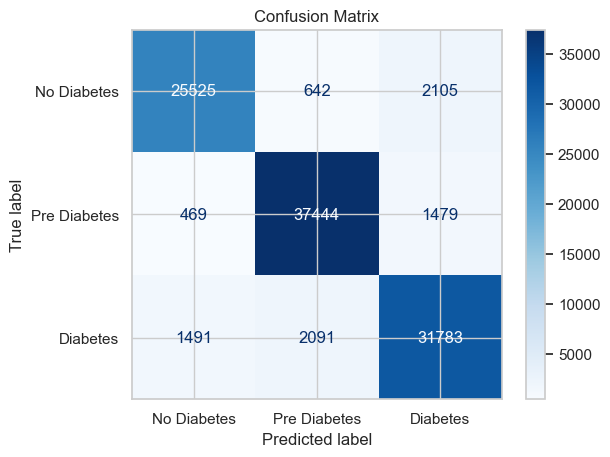

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     28272
         1.0       0.93      0.95      0.94     39392
         2.0       0.90      0.90      0.90     35365

    accuracy                           0.92    103029
   macro avg       0.92      0.92      0.92    103029
weighted avg       0.92      0.92      0.92    103029



In [294]:
# Функция для визуализации Confusion Matrix
def plot_confusion_matrix(yre_test, y_pred_test_dt, class_names):
    """
    Функция для визуализации матрицы ошибок.
    
    :param y_test: Истинные значения
    :param y_pred_test_dt: Предсказанные значения
    :param class_names: Названия классов
    """
    cm = confusion_matrix(yre_test, y_pred_test_dt)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Визуализация Confusion Matrix
class_names = ['No Diabetes', 'Pre Diabetes', 'Diabetes']
plot_confusion_matrix(yre_test, y_pred_test_dt, class_names)

# Вывод отчета о классификации
print(classification_report(yre_test, y_pred_test_dt))

# Вывод предсказаний
results_df = pd.DataFrame({
    'True Values': yre_test,
    'Predictions': y_pred_test_dt
})

2. ***Random Forest***

In [295]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

RandomForestClassifier(max_depth=16, max_features=16)

In [297]:
print(rf.score(xre_train, yre_train))
print(rf.score(xre_test, yre_test))

# вот и проверим на тестовой, чтоб избежать переобучения

accuracy = rf.score(xre_test, yre_test)
print(f"Точность модели с max_depth=None: {accuracy:.2f}")

# Попробуем кросс-валидацию

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, xre_train, yre_train, cv=5)
print(f"Средняя точность кросс-валидации: {scores.mean():.2f}")

y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

print(classification_report(yre_test, y_pred_test_rf))

print('Precision: %.3f' % precision_score(yre_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_rf,average="micro"))

y_pred_prob_rf = rf.predict_proba(xre_test)
roc_auc_score_rf = roc_auc_score(yre_test, y_pred_prob_rf, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_rf)

0.866755961913636
0.8472857156722865
Точность модели с max_depth=None: 0.85
Средняя точность кросс-валидации: 0.85
0.866755961913636
0.8472857156722865
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     28272
         1.0       0.87      0.83      0.85     39392
         2.0       0.77      0.83      0.80     35365

    accuracy                           0.85    103029
   macro avg       0.85      0.85      0.85    103029
weighted avg       0.85      0.85      0.85    103029

Precision: 0.847
Recall: 0.847
F-measure: 0.847
ROC AUC Score: 0.9563249664762079


***KNN***

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xre_train,yre_train) # xre_train-обучающий набор признаков, yre_train - целевой набор

KNeighborsClassifier(n_neighbors=4)

In [299]:
y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

y_pred_test_knn= knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)
print(acc_train_knn)
print(acc_test_knn)

0.9912770745545983
0.9741723204146405


In [300]:
#make predictions on test set
y_pred=knn.predict(x_test)

print('Training set score: {:.4f}'.format(knn.score(xre_train,yre_train)))
print('Test set score: {:.4f}'.format(knn.score(xre_test, yre_test)))
mse_knn = mean_squared_error(yre_test,y_pred_test_knn)
print('MSE_knn: %.3f' % mse_knn)
mae_knn = mean_absolute_error(yre_test, y_pred_test_knn)
print('MAE_knn: %.3f' % mae_knn)

Training set score: 0.9913
Test set score: 0.9742
MSE_knn: 0.068
MAE_knn: 0.040


In [301]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_knn,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_knn,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_knn,average="micro"))

Precision: 0.974
Recall: 0.974
F-measure: 0.974


In [302]:
knn_report = classification_report(yre_test,y_pred_test_knn)
print(knn_report)

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     28272
         1.0       0.97      1.00      0.98     39392
         2.0       0.96      0.98      0.97     35365

    accuracy                           0.97    103029
   macro avg       0.98      0.97      0.97    103029
weighted avg       0.97      0.97      0.97    103029



In [303]:
y_pred_prob_knn = rf.predict_proba(xre_test)
roc_auc_score_knn = roc_auc_score(yre_test, y_pred_prob_knn, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_knn)

ROC AUC Score: 0.9563249664762079


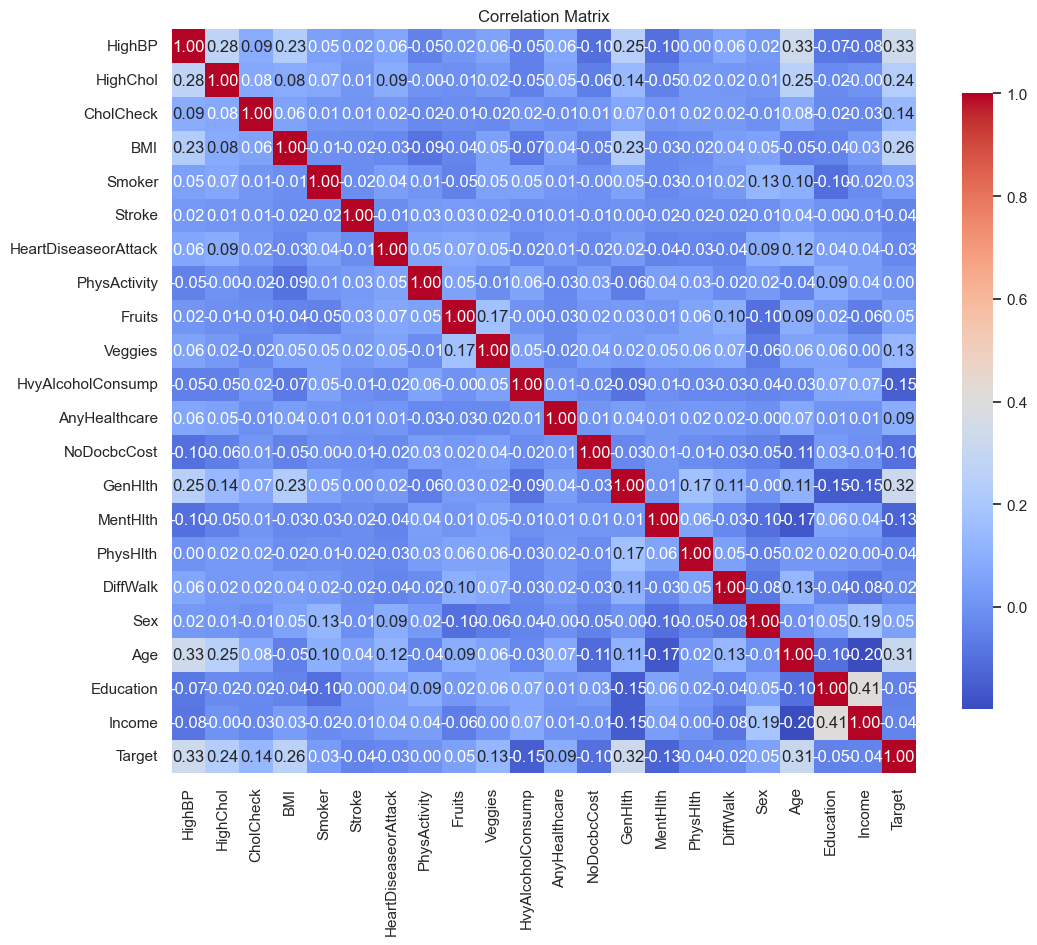

In [304]:
df_train = pd.DataFrame(xre_train, columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                                             'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                                             'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                                             'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                                             'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 
                                             'Age', 'Education', 'Income'])

df_train['Target'] = yre_train  # Добавляем целевой признак

# Вычисление корреляции
correlation_matrix = df_train.corr()

# Визуализация с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

***Extra Trees (Extremly Randomized Trees)*** 
алгоритм машинного обучения, который относится к семейству ансамблевых методов, использующих принцип "деревьев решений". 
Разработан для улучшения производительности моделей, используя несколько деревьев и объединяя их предсказания.

Объединяет множество деревьев решений для улучшения точности и устойчивости модели. Это аналогично методу случайного леса (Random Forest), но с некоторыми различиями.
При построении каждого дерева Extra Trees случайным образом выбирает подмножество признаков, что уменьшает переобучение.
В отличие от Random Forest, который выбирает наилучший порог для каждого признака, Extra Trees выбирает пороги случайным образом. Это приводит к большей случайности и может улучшить производительность модели.
Extra Trees обычно обучаются быстрее, чем Random Forest, из-за случайного выбора порогов.

In [305]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [306]:
etc.fit(xre_train,yre_train)

ExtraTreesClassifier()

In [307]:
yhat = etc.predict(xre_test)

In [308]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,etc.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 100.0
Test set Accuracy : 98.674159702608


In [309]:
y_pred_prob_etc = etc.predict_proba(xre_test)
roc_auc_score_etc = roc_auc_score(yre_test, y_pred_prob_etc, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_etc)

ROC AUC Score: 0.999442940764567


# Оценка точности

In [310]:
y_pred_train_etc= etc.predict(xre_train)
acc_train_etc= accuracy_score(yre_train, y_pred_train_etc)

y_pred_test_etc= etc.predict(xre_test)
acc_test_etc = accuracy_score(yre_test, y_pred_test_etc)
print(acc_train_etc)
print(acc_test_etc)

1.0
0.98674159702608


# Показатели Precision, Recall и F1

In [311]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_etc,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_etc,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_etc,average="micro"))

Precision: 0.987
Recall: 0.987
F-measure: 0.987


In [312]:
xre_train.shape

(240401, 21)

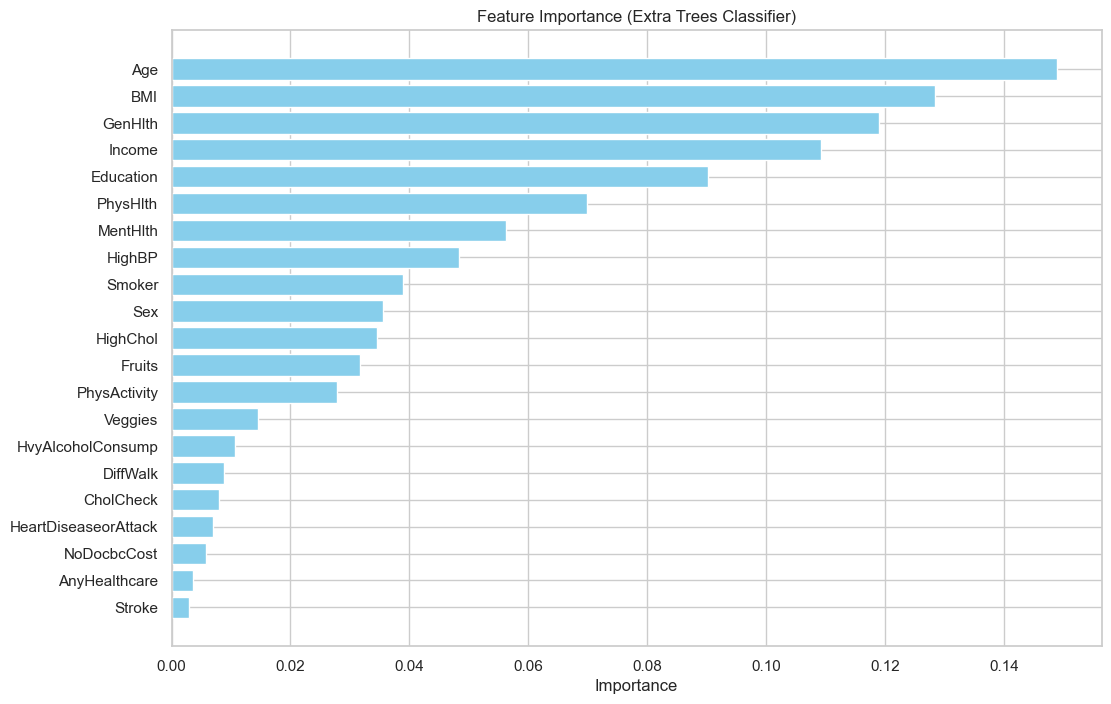

In [313]:
# Визуализация важностей признаков
importances = etc.feature_importances_
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Extra Trees Classifier)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()

In [314]:
etc_report = classification_report(yre_test, y_pred_test_etc)
print(etc_report)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     28272
         1.0       0.99      1.00      1.00     39392
         2.0       0.98      0.99      0.98     35365

    accuracy                           0.99    103029
   macro avg       0.99      0.99      0.99    103029
weighted avg       0.99      0.99      0.99    103029



***Bagging***

In [315]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
tree_clas = DecisionTreeClassifier(random_state=42)

In [316]:
bag_model = BaggingClassifier(
estimator = DecisionTreeClassifier(),
n_estimators = 100,
max_samples = 0.8,
oob_score=True,
random_state = 0
)

In [317]:
bag_model.fit(xre_train, yre_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [318]:
y_pred_train_bag_model = bag_model.predict(xre_train)
acc_train_bag_model = accuracy_score(yre_train, y_pred_train_bag_model)

y_pred_test_bag_model = bag_model.predict(xre_test)
acc_test_bag_model = accuracy_score(yre_test, y_pred_test_bag_model)
print(acc_train_bag_model)
print(acc_test_bag_model)

0.9994051605442573
0.9572256355006843


In [319]:
bag_model.oob_score_

0.9565143239836773

In [320]:
y_pred_prob_bag_model = bag_model.predict_proba(xre_test)
roc_auc_score_bag_model = roc_auc_score(yre_test, y_pred_prob_bag_model, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_bag_model)

ROC AUC Score: 0.9928896633712275


In [321]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_bag_model,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_bag_model,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_bag_model,average="micro"))

Precision: 0.957
Recall: 0.957
F-measure: 0.957


***Сравнение алгоритмов***

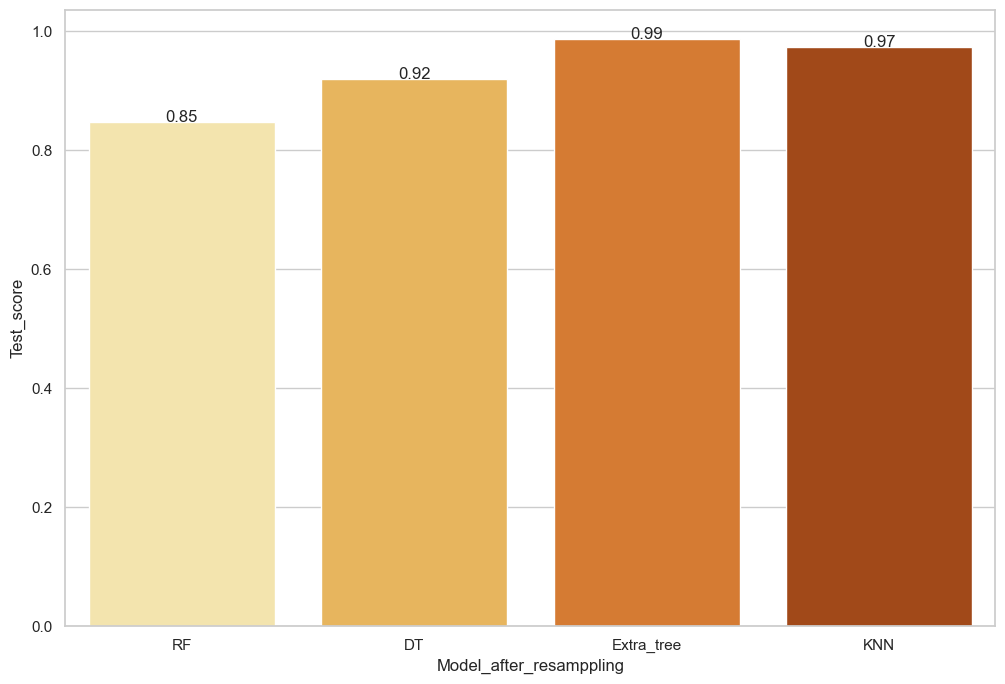

In [322]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['RF','DT','Extra_tree','KNN'],
        'Test_score': [
                     accuracy_score(yre_test, y_pred_test_rf),
                     accuracy_score(yre_test, y_pred_test_dt),
                     accuracy_score(yre_test, y_pred_test_etc),
                     accuracy_score(yre_test, y_pred_test_knn)],
        
        'ROC_AUC_Score': [
                         roc_auc_score_rf, 
                         roc_auc_score_dt,
                         roc_auc_score_etc,
                         roc_auc_score_knn ]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [323]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Test_score,ROC_AUC_Score
2,Extra_tree,0.986742,0.999443
0,RF,0.847286,0.956325
3,KNN,0.974172,0.956325
1,DT,0.919663,0.938338


In [324]:
print(xre_train.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [325]:
print(xre_test.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [326]:
print(df.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [327]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (classification_report, accuracy_score, 
                             mean_squared_error, mean_absolute_error, 
                             precision_score, recall_score, f1_score, 
                             roc_auc_score)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [347]:
# Создаем модель
lg = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='liblinear', class_weight='balanced')

# Балансировка классов с помощью SMOTE
smote = SMOTE()
xre_train, yre_train = smote.fit_resample(xre_train, yre_train)
print(pd.Series(yre_train).value_counts())

In [348]:
# Выполняем кросс-валидацию
cv_scores = cross_val_score(lg, xre_train, yre_train, cv=5)  # cv=5 означает 5 фолдов
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.56858064 0.57078558 0.57144159 0.57309206 0.57475035]


In [349]:
lg.fit(xre_train, yre_train)  # Обучаем модель


LogisticRegression(class_weight='balanced', penalty='l1', random_state=0,
                   solver='liblinear')

In [350]:
print(lg.score(xre_train, yre_train))
print(lg.score(xre_test, yre_test))

0.5718029178192526
0.5492045928816158


In [351]:
y_pred_train_lg = lg.predict(xre_train)
acc_train_lg = accuracy_score(yre_train, y_pred_train_lg)

y_pred_test_lg = lg.predict(xre_test)
acc_test_lg = accuracy_score(yre_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

# Расчет ошибок
print(f'MSE: { mean_squared_error(yre_test, y_pred_test_lg)}')
print(f'MAE: { mean_absolute_error(yre_test, y_pred_test_lg)}')

print(classification_report(yre_test, y_pred_test_lg))

0.5718029178192526
0.5492045928816158
MSE: 0.6665599006105077
MAE: 0.522716904949092
              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67     28272
         1.0       0.51      0.28      0.36     39392
         2.0       0.53      0.68      0.59     35365

    accuracy                           0.55    103029
   macro avg       0.55      0.57      0.54    103029
weighted avg       0.54      0.55      0.53    103029



In [352]:
y_pred_prob_lg = lg.predict_proba(xre_test)
roc_auc_score_lg = roc_auc_score(yre_test, y_pred_prob_lg, multi_class="ovr", average='macro')
print('ROC AUC Score:', roc_auc_score_lg) 

ROC AUC Score: 0.747720555241226
